In [1]:
### Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
import datetime
import matplotlib.colors as clr
from collections import Counter

In [3]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
# Importing classification report and confusion matrix etc from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score

#Improting the PCA module
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

import graphviz
from IPython.display import Image
import pydotplus
#import pydot_ng as pydot
from sklearn import tree
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz


import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.svm import SVC


C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Reading the data.

In [4]:
telecom=pd.read_csv("D:\\PYTHON_MAIN_COURSE(IIIT-Bnglr)\\COURSE-4-ML_PRED-ANALYSIS-2\\ASSIGNMENT\\GROUP+ASSIGNMENT-TELECOM_CHURN_PRDCTN\\telecom_churn_data.csv")

In [5]:
telecom.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.258,...,0,NaN,NaN,NaN,NaN,1471,0.00,0.00,0.00,0.00
6,7001051193,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,429.023,...,0,NaN,NaN,NaN,NaN,1673,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,...,0,NaN,1.0,NaN,NaN,902,0.00,0.00,0.00,0.00


In [6]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
telecom.shape

(99999, 226)

In [8]:
telecom.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

## Analysing and cleaning the data.


In [9]:
#unique values in the columns.
telecom.apply(pd.Series.nunique)

mobile_number           99999
circle_id                   1
loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_6        1
last_date_of_month_7        1
last_date_of_month_8        1
last_date_of_month_9        1
arpu_6                  85681
arpu_7                  85308
arpu_8                  83615
arpu_9                  79937
onnet_mou_6             24313
onnet_mou_7             24336
onnet_mou_8             24089
onnet_mou_9             23565
offnet_mou_6            31140
offnet_mou_7            31023
offnet_mou_8            30908
offnet_mou_9            30077
roam_ic_mou_6            6512
roam_ic_mou_7            5230
roam_ic_mou_8            5315
roam_ic_mou_9            4827
roam_og_mou_6            8038
roam_og_mou_7            6639
roam_og_mou_8            6504
roam_og_mou_9            5882
loc_og_t2t_mou_6        13539
                        ...  
arpu_2g_9                6795
night_pck_user_6            2
night_pck_

## Analysing null values .

In [10]:
[(round(telecom.isnull().sum()*100/len(telecom.index),2).sort_values(ascending=False))]

[count_rech_2g_6             74.85
 date_of_last_rech_data_6    74.85
 count_rech_3g_6             74.85
 av_rech_amt_data_6          74.85
 max_rech_data_6             74.85
 total_rech_data_6           74.85
 arpu_3g_6                   74.85
 arpu_2g_6                   74.85
 night_pck_user_6            74.85
 fb_user_6                   74.85
 arpu_3g_7                   74.43
 count_rech_2g_7             74.43
 fb_user_7                   74.43
 count_rech_3g_7             74.43
 arpu_2g_7                   74.43
 av_rech_amt_data_7          74.43
 max_rech_data_7             74.43
 night_pck_user_7            74.43
 total_rech_data_7           74.43
 date_of_last_rech_data_7    74.43
 night_pck_user_9            74.08
 date_of_last_rech_data_9    74.08
 fb_user_9                   74.08
 arpu_2g_9                   74.08
 max_rech_data_9             74.08
 arpu_3g_9                   74.08
 total_rech_data_9           74.08
 av_rech_amt_data_9          74.08
 count_rech_3g_9    

In [11]:
#### Let's further try to identify null value columns with greater than 65% null values
high_null_columns = telecom.columns[(telecom.isnull().sum()*100/telecom.shape[0] > 65)]
print(round(telecom[high_null_columns].isnull().sum()*100/telecom.shape[0]),2)

date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

In [12]:
## Dropping columns having high percentage of nulls, which wont help genuinely in analysis. 

In [13]:
telecom.drop(['fb_user_9','fb_user_8','fb_user_7','fb_user_6','night_pck_user_6','night_pck_user_7','night_pck_user_8',
             'night_pck_user_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
              'date_of_last_rech_data_9','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
              'count_rech_2g_9','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9'],axis=1,inplace=True)

In [14]:
telecom['arpu_data_6']=telecom['arpu_2g_6']+telecom['arpu_3g_6']
telecom['arpu_data_7']=telecom['arpu_2g_7']+telecom['arpu_3g_7']
telecom['arpu_data_8']=telecom['arpu_2g_8']+telecom['arpu_3g_8']
telecom['arpu_data_9']=telecom['arpu_2g_9']+telecom['arpu_3g_9']

## lets impute the column with 0
telecom['arpu_data_6'].fillna(0,inplace=True)
telecom['arpu_data_7'].fillna(0,inplace=True)
telecom['arpu_data_8'].fillna(0,inplace=True)
telecom['arpu_data_9'].fillna(0,inplace=True)

In [15]:
telecom.shape

(99999, 210)

In [16]:
## we observe that appprox 75% of data for columns avg _recharge_amount,max_recharge and total recharge amount is unavailable

In [17]:
## now analysing those columns
rech_col_6=telecom.columns[telecom.columns.str.contains('rech_amt_6|rech_data_6|rech_amt_data_6')]
telecom[rech_col_6].describe()

,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
count,99999.000000,99999.000000,25153.000000,25153.000000,25153.000000
mean,327.514615,104.637486,2.463802,126.393392,192.600982
std,398.019701,120.614894,2.789128,108.477235,192.646318
min,0.000000,0.000000,1.000000,1.000000,1.000000
25%,109.000000,30.000000,1.000000,25.000000,82.000000
50%,230.000000,110.000000,1.000000,145.000000,154.000000
75%,437.500000,120.000000,3.000000,177.000000,252.000000
max,35190.000000,4010.000000,61.000000,1555.000000,7546.000000


In [18]:
rech_col_7=telecom.columns[telecom.columns.str.contains('rech_amt_7|rech_data_7|rech_amt_data_7')]
telecom[rech_col_7].describe()

,total_rech_amt_7,max_rech_amt_7,total_rech_data_7,max_rech_data_7,av_rech_amt_data_7
count,99999.000000,99999.000000,25571.000000,25571.000000,25571.000000
mean,322.962970,104.752398,2.666419,126.729459,200.981292
std,408.114237,124.523970,3.031593,109.765267,196.791224
min,0.000000,0.000000,1.000000,1.000000,0.500000
25%,100.000000,30.000000,1.000000,25.000000,92.000000
50%,220.000000,110.000000,1.000000,145.000000,154.000000
75%,428.000000,128.000000,3.000000,177.000000,252.000000
max,40335.000000,4010.000000,54.000000,1555.000000,4365.000000


In [19]:
rech_col_8=telecom.columns[telecom.columns.str.contains('rech_amt_8|rech_data_8|rech_amt_data_8')]
telecom[rech_col_8].describe()

,total_rech_amt_8,max_rech_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8
count,99999.000000,99999.000000,26339.000000,26339.000000,26339.000000
mean,324.157122,107.728207,2.651999,125.717301,197.526489
std,416.540455,126.902505,3.074987,109.437851,191.301305
min,0.000000,0.000000,1.000000,1.000000,0.500000
25%,90.000000,30.000000,1.000000,25.000000,87.000000
50%,225.000000,98.000000,1.000000,145.000000,154.000000
75%,434.500000,144.000000,3.000000,179.000000,252.000000
max,45320.000000,4449.000000,60.000000,1555.000000,4076.000000


In [20]:
# as we can see that min values are 0 or 1 ,so we can impute the nulls with 0,i.e customer didnt 
# do any recharge and that wont distort our data
telecom.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']] =telecom.loc[:,['total_rech_data_6',
        'total_rech_data_7','total_rech_data_8','total_rech_data_9']].replace(np.NaN,0)

In [21]:
telecom.loc[:,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']]= telecom.loc[:,['av_rech_amt_data_6',
        'av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']].replace(np.NaN,0)

In [22]:
telecom.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9']]=telecom.loc[:,['max_rech_data_6',
    'max_rech_data_7','max_rech_data_8','max_rech_data_9']].replace(np.NaN,0)

In [23]:
### Lets define the total amount data for good phase and fiter out high value customers fromthe crowd.
telecom['av_rech_amt_6_7'] = (telecom['total_rech_amt_6']+telecom['total_rech_amt_7']).astype(float)/(telecom['total_rech_num_6']+telecom['total_rech_num_7'])
telecom['av_rech_data_6_7'] = (telecom['av_rech_amt_data_6']+telecom['av_rech_amt_data_7']).astype(float)/2
telecom['average_rech_6_7'] = telecom['av_rech_amt_6_7'] + telecom['av_rech_data_6_7']

telecom_hv = telecom[telecom['average_rech_6_7'] >= telecom['average_rech_6_7'].quantile(.7)]

#### Remove any columns used for temporary calculations average column used for filtering and keep remaining

telecom.drop('av_rech_amt_6_7',axis=1,inplace=True)
telecom.drop('av_rech_data_6_7',axis=1,inplace=True)
telecom_hv.drop('average_rech_6_7',axis=1,inplace=True)

telecom_hv.shape

(29947, 212)

In [24]:
[(round(telecom.isnull().sum()*100/len(telecom.index),2).sort_values(ascending=False))]

[arpu_2g_6             74.85
 arpu_3g_6             74.85
 arpu_2g_7             74.43
 arpu_3g_7             74.43
 arpu_2g_9             74.08
 arpu_3g_9             74.08
 arpu_2g_8             73.66
 arpu_3g_8             73.66
 loc_og_t2t_mou_9       7.75
 loc_ic_mou_9           7.75
 std_ic_t2t_mou_9       7.75
 loc_og_t2f_mou_9       7.75
 loc_og_t2c_mou_9       7.75
 std_og_t2f_mou_9       7.75
 loc_og_mou_9           7.75
 std_ic_t2f_mou_9       7.75
 std_og_t2t_mou_9       7.75
 std_ic_t2o_mou_9       7.75
 std_og_t2m_mou_9       7.75
 std_ic_mou_9           7.75
 spl_og_mou_9           7.75
 std_og_mou_9           7.75
 std_og_t2c_mou_9       7.75
 ic_others_9            7.75
 spl_ic_mou_9           7.75
 std_ic_t2m_mou_9       7.75
 loc_og_t2m_mou_9       7.75
 onnet_mou_9            7.75
 loc_ic_t2m_mou_9       7.75
 og_others_9            7.75
                       ...  
 total_rech_num_8       0.00
 total_rech_num_7       0.00
 total_rech_num_6       0.00
 total_ic_mou_

In [25]:
## Let's further try to identify null value columns with greater than 0% null values
nulls = telecom.columns[(telecom.isnull().sum()*100/telecom.shape[0] > 0)]
print((round(telecom[nulls].isnull().sum()*100/telecom.shape[0]),2))

(loc_og_t2o_mou           1.0
std_og_t2o_mou           1.0
loc_ic_t2o_mou           1.0
last_date_of_month_7     1.0
last_date_of_month_8     1.0
last_date_of_month_9     2.0
onnet_mou_6              4.0
onnet_mou_7              4.0
onnet_mou_8              5.0
onnet_mou_9              8.0
offnet_mou_6             4.0
offnet_mou_7             4.0
offnet_mou_8             5.0
offnet_mou_9             8.0
roam_ic_mou_6            4.0
roam_ic_mou_7            4.0
roam_ic_mou_8            5.0
roam_ic_mou_9            8.0
roam_og_mou_6            4.0
roam_og_mou_7            4.0
roam_og_mou_8            5.0
roam_og_mou_9            8.0
loc_og_t2t_mou_6         4.0
loc_og_t2t_mou_7         4.0
loc_og_t2t_mou_8         5.0
loc_og_t2t_mou_9         8.0
loc_og_t2m_mou_6         4.0
loc_og_t2m_mou_7         4.0
loc_og_t2m_mou_8         5.0
loc_og_t2m_mou_9         8.0
                        ... 
std_ic_t2o_mou_9         8.0
std_ic_mou_6             4.0
std_ic_mou_7             4.0
std_ic_mou_8 

In [26]:
telecom[nulls].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,ic_others_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,average_rech_6_7
count,98981.0,98981.0,98981.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,...,92254.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99814.000000
mean,0.0,0.0,0.0,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,...,1.017162,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,98.316303
std,0.0,0.0,0.0,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,...,12.381172,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224,140.104109
min,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-30.820000,-26.040000,-24.490000,-71.090000,-35.830000,-15.480000,-55.830000,-45.740000,0.000000
25%,0.0,0.0,0.0,7.380000,6.660000,6.460000,5.330000,34.730000,32.190000,31.630000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.750000
50%,0.0,0.0,0.0,34.310000,32.330000,32.360000,29.840000,96.310000,91.735000,92.140000,...,0.000000,0.480000,0.420000,0.880000,2.605000,10.830000,8.810000,9.270000,14.800000,50.000000
75%,0.0,0.0,0.0,118.740000,115.595000,115.860000,112.130000,231.860000,226.815000,228.260000,...,0.000000,122.070000,119.560000,122.070000,140.010000,122.070000,122.070000,122.070000,140.010000,112.666667
max,0.0,0.0,0.0,7376.710000,8157.780000,10752.560000,10427.460000,8362.360000,9667.130000,14007.340000,...,1005.230000,6362.280000,4980.900000,3716.900000,13884.310000,6433.760000,4809.360000,3483.170000,3467.170000,6171.000000


In [27]:
## now  these columns have null <10% ,so dropping  them or removing the null rows is not a good method as this will distort 
#our churn ratio,imputing them with 0 as min value of these is 0.
for i in nulls:
    telecom[i].fillna(0,inplace=True)

In [28]:
telecom_hv.shape

(29947, 212)

In [29]:
telecom_hv.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou            533
std_og_t2o_mou            533
loc_ic_t2o_mou            533
last_date_of_month_6        0
last_date_of_month_7      122
last_date_of_month_8      317
last_date_of_month_9      501
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              1122
onnet_mou_7              1102
onnet_mou_8              1716
onnet_mou_9              2343
offnet_mou_6             1122
offnet_mou_7             1102
offnet_mou_8             1716
offnet_mou_9             2343
roam_ic_mou_6            1122
roam_ic_mou_7            1102
roam_ic_mou_8            1716
roam_ic_mou_9            2343
roam_og_mou_6            1122
roam_og_mou_7            1102
roam_og_mou_8            1716
roam_og_mou_9            2343
loc_og_t2t_mou_6         1122
                        ...  
arpu_2g_7                9207
arpu_2g_8               11758
arpu_2g_9 

In [30]:
## Let's further try to identify null value columns with greater than 0% null values
nulls_hv = telecom_hv.columns[(telecom_hv.isnull().sum()*100/telecom_hv.shape[0] > 0)]
print((round(telecom_hv[nulls_hv].isnull().sum()*100/telecom_hv.shape[0]),2))

(loc_og_t2o_mou           2.0
std_og_t2o_mou           2.0
loc_ic_t2o_mou           2.0
last_date_of_month_7     0.0
last_date_of_month_8     1.0
last_date_of_month_9     2.0
onnet_mou_6              4.0
onnet_mou_7              4.0
onnet_mou_8              6.0
onnet_mou_9              8.0
offnet_mou_6             4.0
offnet_mou_7             4.0
offnet_mou_8             6.0
offnet_mou_9             8.0
roam_ic_mou_6            4.0
roam_ic_mou_7            4.0
roam_ic_mou_8            6.0
roam_ic_mou_9            8.0
roam_og_mou_6            4.0
roam_og_mou_7            4.0
roam_og_mou_8            6.0
roam_og_mou_9            8.0
loc_og_t2t_mou_6         4.0
loc_og_t2t_mou_7         4.0
loc_og_t2t_mou_8         6.0
loc_og_t2t_mou_9         8.0
loc_og_t2m_mou_6         4.0
loc_og_t2m_mou_7         4.0
loc_og_t2m_mou_8         6.0
loc_og_t2m_mou_9         8.0
                        ... 
std_ic_t2o_mou_8         6.0
std_ic_t2o_mou_9         8.0
std_ic_mou_6             4.0
std_ic_mou_7 

In [31]:
for i in nulls_hv:
    telecom_hv[i].fillna(0,inplace=True)

In [32]:
telecom_hv.isnull().sum()

mobile_number           0
circle_id               0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
last_date_of_month_7    0
last_date_of_month_8    0
last_date_of_month_9    0
arpu_6                  0
arpu_7                  0
arpu_8                  0
arpu_9                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
onnet_mou_9             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
offnet_mou_9            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_ic_mou_9           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
roam_og_mou_9           0
loc_og_t2t_mou_6        0
                       ..
arpu_2g_7               0
arpu_2g_8               0
arpu_2g_9               0
monthly_2g_6            0
monthly_2g_7            0
monthly_2g_8            0
monthly_2g_9            0
sachet_2g_6 

#  Creating labels for churned and non churned customers.

In [33]:
# we have to make a new column 'churn' and  assign value '1' for those who churned and '0' for no churned
# the 9 month data is required for this purpose. the colums needed are 'total_ic_mou_9', 'total_og_mou_9', 
# 'vol_2g_mb_9' and vol_3g_mb_9'
#now creating  a boolean function to represent  where these values are 0

In [34]:
telecom_hv['churn_flag'] = np.where(
                            ((telecom_hv['total_ic_mou_9'] == 0.00) & (telecom_hv['total_og_mou_9'] == 0.00))
                            & ((telecom_hv['vol_2g_mb_9'] == 0.00) & (telecom_hv['vol_3g_mb_9'] == 0.00))
                            , 1, 0
                           )


In [35]:
print(telecom_hv['churn_flag'].value_counts())
print(telecom_hv['churn_flag'].value_counts()/telecom_hv.shape[0])

0    27511
1     2436
Name: churn_flag, dtype: int64
0    0.918656
1    0.081344
Name: churn_flag, dtype: float64


In [36]:
print("the percentage of churned customers is",telecom_hv['churn_flag'].sum()*100/telecom_hv.shape[0])

the percentage of churned customers is 8.134370721608175


In [37]:
print("customers churned :",telecom_hv['churn_flag'].sum())
print("out of :",telecom_hv.shape[0])

customers churned : 2436
out of : 29947


In [38]:
print("customers didn't chuned :",telecom_hv.shape[0]-telecom_hv['churn_flag'].sum())

customers didn't chuned : 27511


## now analyszing the data.

In [39]:
# dropping 9th month column
cols_sept=[col for col in telecom if '_9' in col]
print("shape before dropping september month columns :",telecom_hv.shape)
telecom_hv.drop(cols_sept,axis=1,inplace=True)
print("shape after dropping september month columns :",telecom_hv.shape)

shape before dropping september month columns : (29947, 213)
shape after dropping september month columns : (29947, 163)


<Figure size 720x720 with 0 Axes>

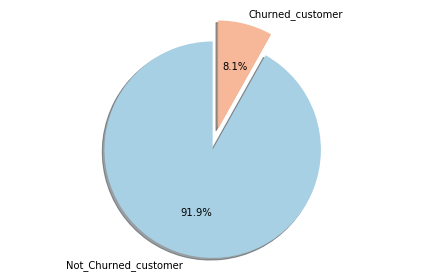

In [40]:
labels =(['Not_Churned_customer', 'Churned_customer'])
#count each type
churn_count = len(telecom_hv[(telecom_hv['churn_flag']==True)])
no_churn_count = len(telecom_hv) - churn_count
sizes = [no_churn_count, churn_count]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.2)  
plt.figure(figsize=(10,10))
fig1, ax1 = plt.subplots()

colors = sns.color_palette("RdBu_r", n_colors=2)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors,shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

### we can visualize from here that the churned customers are 8.1% of total high value customers.

In [41]:
##deleting all columns with 1 unique value as they wont add anything to analysis
telecom_hv=telecom_hv.loc[:,telecom_hv.nunique()!=1]

In [42]:
telecom_hv.shape

(29947, 152)

In [43]:
telecom_hv['churn_flag'].value_counts()

0    27511
1     2436
Name: churn_flag, dtype: int64

### There's a heavy class imbalance as churns are only 8% and non churns approx 92% .

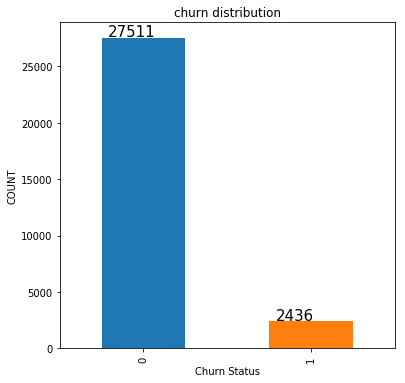

In [44]:
plt.figure(figsize=(6,6))
fig1=telecom_hv['churn_flag'].value_counts().plot(kind='bar')
plt.ylabel('COUNT')
plt.xlabel("Churn Status")
plt.title("churn distribution")
for i in fig1.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig1.text(i.get_x()+.04, i.get_height()+120, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

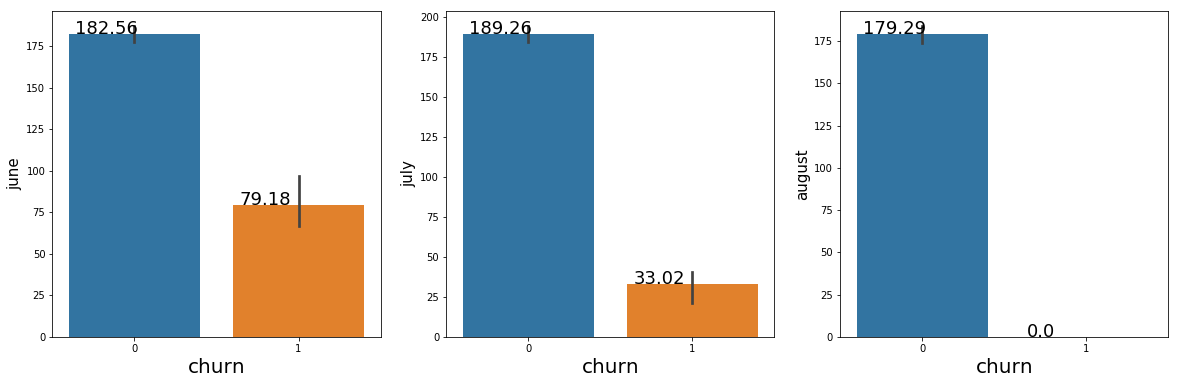

In [45]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
fig_1=sns.barplot(x='churn_flag',y='total_og_mou_6',estimator=np.median,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("june",fontsize=15)
for i in fig_1.patches:
    fig_1.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',rotation=0)



plt.subplot(1,3,2)
fig_2=sns.barplot(x='churn_flag',y='total_og_mou_7',estimator=np.median,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("july",fontsize=15)
for i in fig_2.patches:
    fig_2.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',rotation=0)



plt.subplot(1,3,3)
fig_3=sns.barplot(x='churn_flag',y='total_og_mou_8',estimator=np.median,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("august",fontsize=15)
for i in fig_3.patches:
    fig_3.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',rotation=0)


plt.xticks(fontsize=10)

## Total out going calls in 6th,th,8th month.

Text(0.5, 1.0, 'Non-Churn')

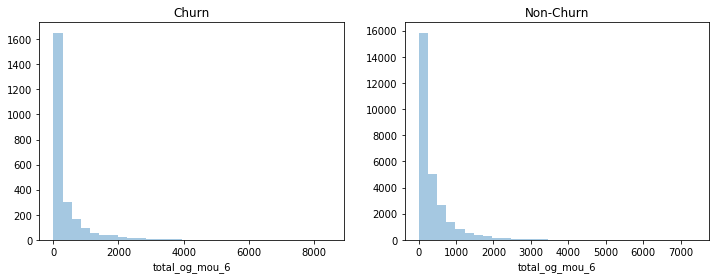

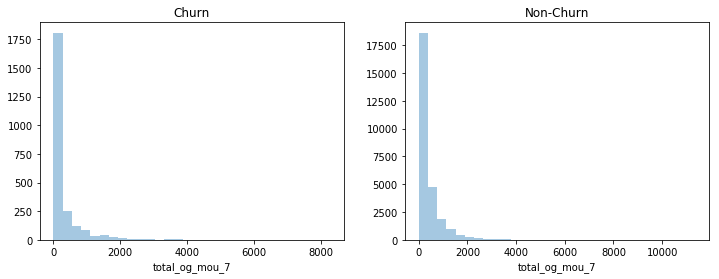

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(telecom_hv[telecom_hv['churn_flag']==1].total_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(telecom_hv[telecom_hv['churn_flag']==0].total_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(telecom_hv[telecom_hv['churn_flag']==1].total_og_mou_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(telecom_hv[telecom_hv['churn_flag']==0].total_og_mou_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

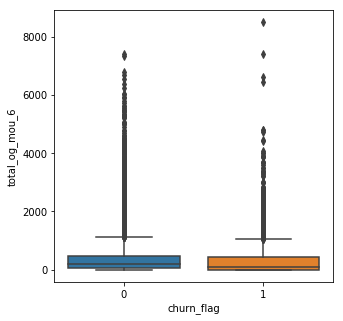

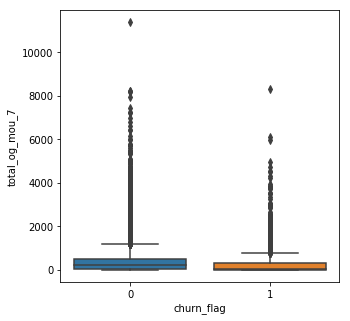

In [47]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5))
sns.boxplot(x='churn_flag',y='total_og_mou_6',data=telecom_hv)

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5))
sns.boxplot(x='churn_flag',y='total_og_mou_7',data=telecom_hv)

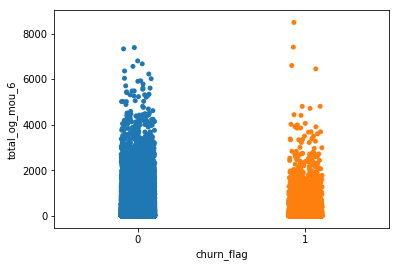

In [48]:
sns.stripplot(x='churn_flag',y='total_og_mou_6',data=telecom_hv,jitter=True,edgecolor='blue')

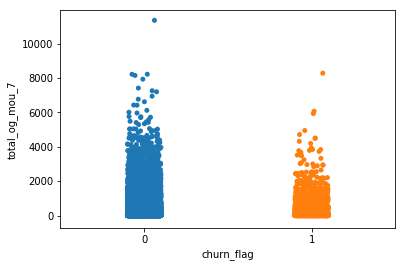

In [49]:
sns.stripplot(x='churn_flag',y='total_og_mou_7',data=telecom_hv,jitter=True,edgecolor='blue')

## incoming calls outside the circle

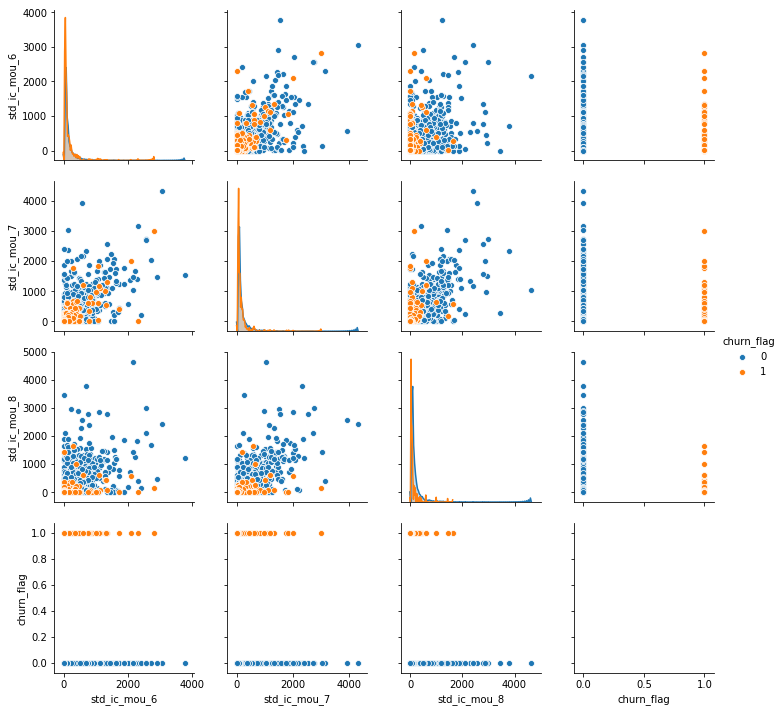

In [50]:
sns.pairplot(data=telecom_hv[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churn_flag']],hue='churn_flag')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

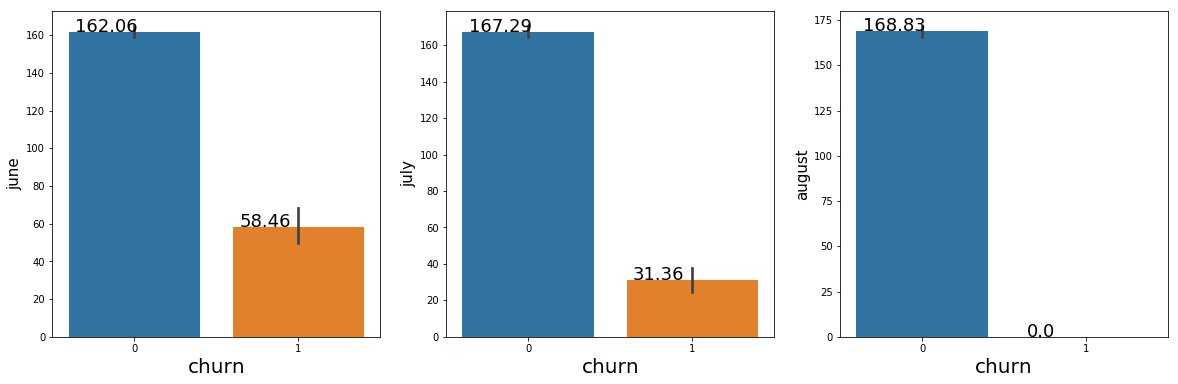

In [51]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
fig_1=sns.barplot(x='churn_flag',y='total_ic_mou_6',estimator=np.median,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("june",fontsize=15)
for i in fig_1.patches:
    fig_1.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',rotation=0)



plt.subplot(1,3,2)
fig_2=sns.barplot(x='churn_flag',y='total_ic_mou_7',estimator=np.median,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("july",fontsize=15)
for i in fig_2.patches:
    fig_2.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',rotation=0)



plt.subplot(1,3,3)
fig_3=sns.barplot(x='churn_flag',y='total_ic_mou_8',estimator=np.median,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("august",fontsize=15)
for i in fig_3.patches:
    fig_3.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',rotation=0)


plt.xticks(fontsize=10)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

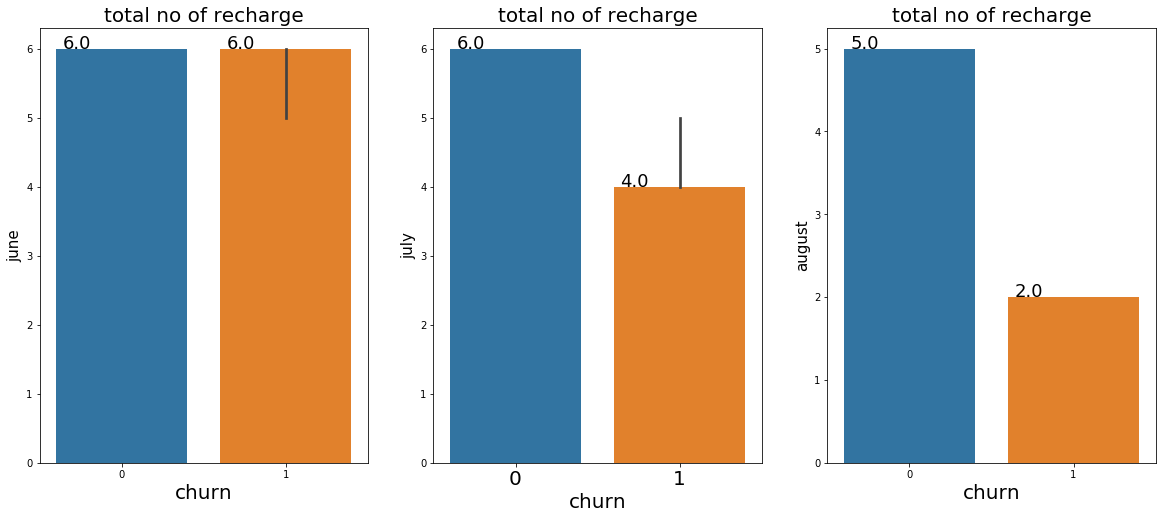

In [52]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
fig4=sns.barplot(x='churn_flag',y='total_rech_num_6',estimator=np.median,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("june",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig4.patches:
    fig4.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',rotation=0)

plt.title("total no of recharge",fontsize=20)

plt.subplot(1,3,2)
fig5=sns.barplot(x='churn_flag',y='total_rech_num_7',estimator=np.median,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("july",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig5.patches:
    fig5.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.title("total no of recharge",fontsize=20)

plt.subplot(1,3,3)
fig6=sns.barplot(x='churn_flag',y='total_rech_num_8',estimator=np.median,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("august",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig6.patches:
    fig6.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.title("total no of recharge",fontsize=20)

plt.xticks(fontsize=10)

### as we can see from here number of recahrges are decreasing for churned customers month by month.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

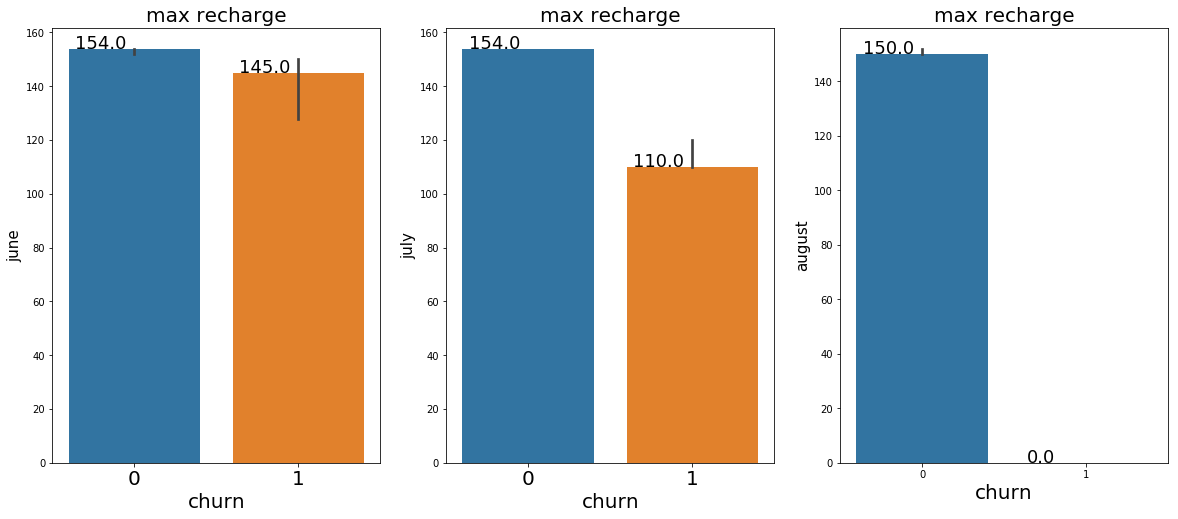

In [53]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
fig4=sns.barplot(x='churn_flag',y='max_rech_amt_6',estimator=np.median,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("june",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig4.patches:
    fig4.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',rotation=0)

plt.title("max recharge",fontsize=20)

plt.subplot(1,3,2)
fig5=sns.barplot(x='churn_flag',y='max_rech_amt_7',estimator=np.median,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("july",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig5.patches:
    fig5.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.title("max recharge",fontsize=20)

plt.subplot(1,3,3)
fig6=sns.barplot(x='churn_flag',y='max_rech_amt_8',estimator=np.median,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("august",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig6.patches:
    fig6.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.title("max recharge",fontsize=20)

plt.xticks(fontsize=10)

### max recharge amount for churned and non churned customers over months of june ,july ,august
### It can be seen from here that it got decreased to 0 in the month of august for those who churned ,and it kept on dcereasing  from june to july to august ,while those who didn't churn did fared well on all the three months.

Text(0.5, 1.0, 'Total Recharge')

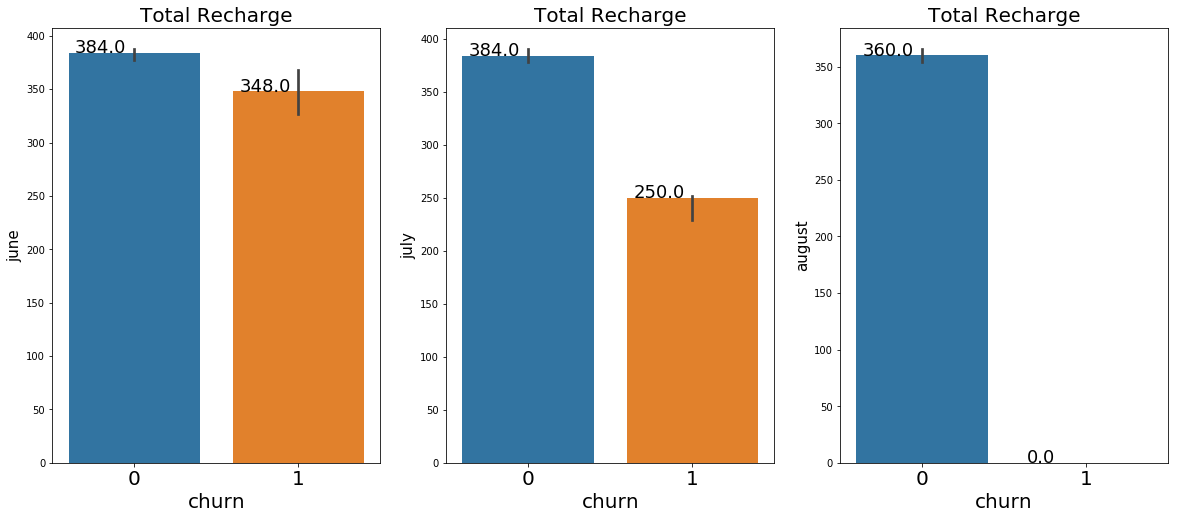

In [54]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
fig4=sns.barplot(x='churn_flag',y='total_rech_amt_6',estimator=np.median,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("june",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig4.patches:
    fig4.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',rotation=0)

plt.title("Total Recharge",fontsize=20)

plt.subplot(1,3,2)
fig5=sns.barplot(x='churn_flag',y='total_rech_amt_7',estimator=np.median,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("july",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig5.patches:
    fig5.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.title("Total Recharge",fontsize=20)


plt.subplot(1,3,3)
fig6=sns.barplot(x='churn_flag',y='total_rech_amt_8',estimator=np.median,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("august",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig6.patches:
    fig6.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.title("Total Recharge",fontsize=20)



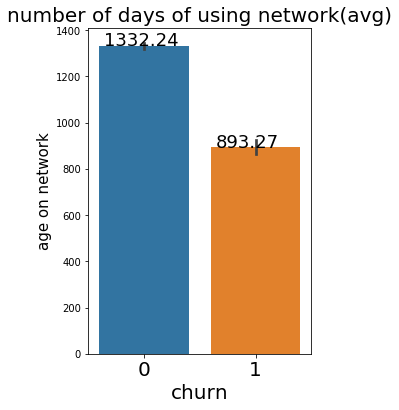

In [55]:
plt.figure(figsize=(4,6))
fig4=sns.barplot(x='churn_flag',y='aon',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("age on network",fontsize=15)
plt.title("number of days of using network(avg)",fontsize=20)
plt.rcParams['xtick.labelsize']=20
for i in fig4.patches:
    fig4.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',rotation=0)


### same phenomenon can be visualized from here also.

Text(0.5, 1.0, 'Total Recharge(Data)')

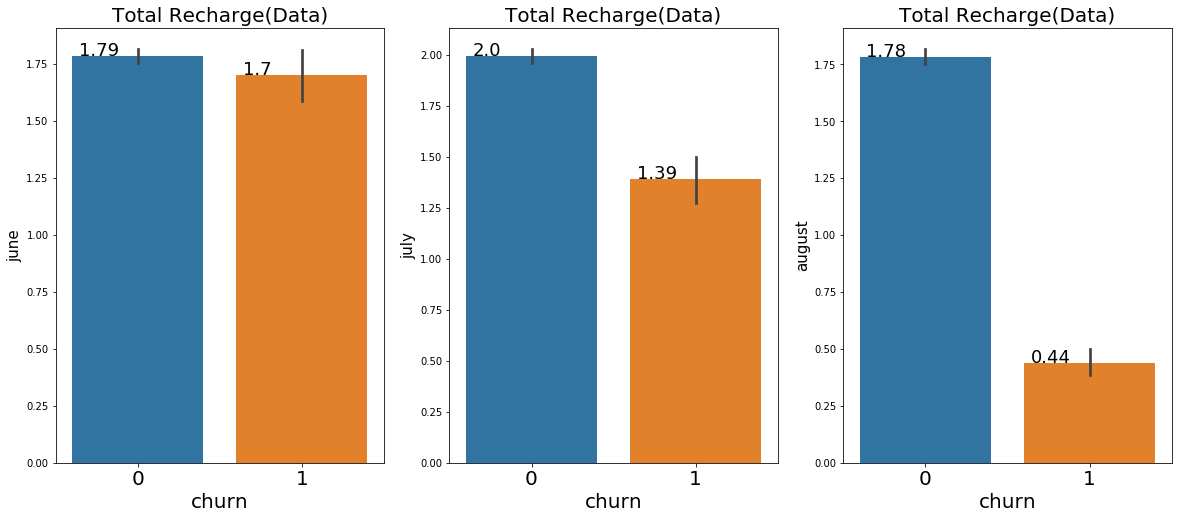

In [56]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
fig4=sns.barplot(x='churn_flag',y='total_rech_data_6',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("june",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig4.patches:
    fig4.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',rotation=0)

plt.title("Total Recharge(Data)",fontsize=20)

plt.subplot(1,3,2)
fig5=sns.barplot(x='churn_flag',y='total_rech_data_7',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("july",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig5.patches:
    fig5.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.title("Total Recharge(Data)",fontsize=20)


plt.subplot(1,3,3)
fig6=sns.barplot(x='churn_flag',y='total_rech_data_8',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("august",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig6.patches:
    fig6.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.title("Total Recharge(Data)",fontsize=20)



### In data recharge also non churned customers adre doing fair job as they are consistent in their recharge but churned out customers decreasing their recharge values every month

Text(0.5, 1.0, 'Cost as per usage')

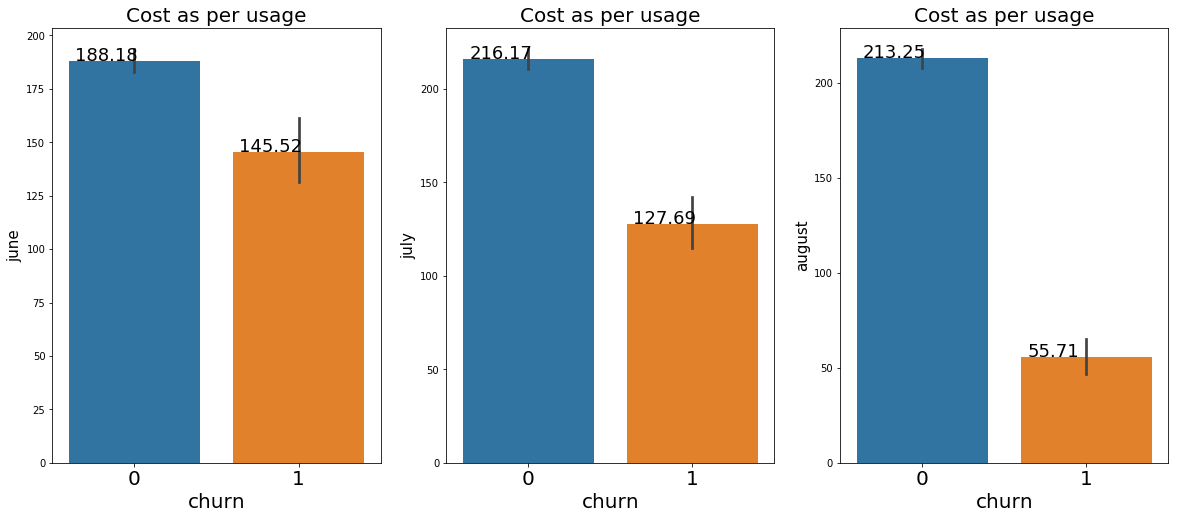

In [57]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
fig4=sns.barplot(x='churn_flag',y='jun_vbc_3g',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("june",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig4.patches:
    fig4.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',rotation=0)

plt.title("Cost as per usage",fontsize=20)

plt.subplot(1,3,2)
fig5=sns.barplot(x='churn_flag',y='jul_vbc_3g',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("july",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig5.patches:
    fig5.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.title("Cost as per usage",fontsize=20)


plt.subplot(1,3,3)
fig6=sns.barplot(x='churn_flag',y='aug_vbc_3g',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("august",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig6.patches:
    fig6.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.title("Cost as per usage",fontsize=20)



Text(0.5, 1.0, 'Calls within network')

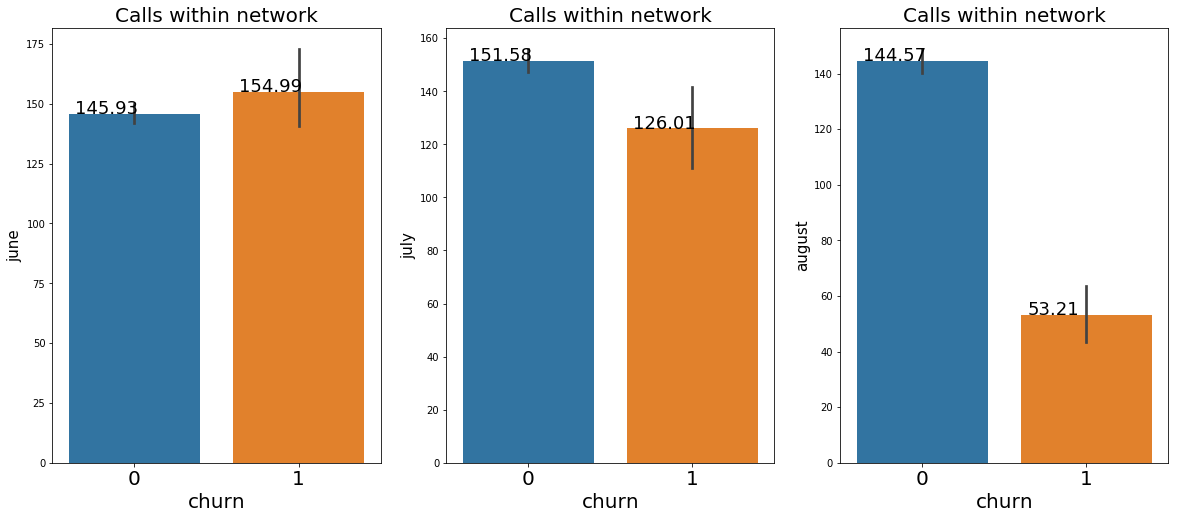

In [58]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
fig4=sns.barplot(x='churn_flag',y='onnet_mou_6',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("june",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig4.patches:
    fig4.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',rotation=0)

plt.title("Calls within network",fontsize=20)

plt.subplot(1,3,2)
fig5=sns.barplot(x='churn_flag',y='onnet_mou_7',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("july",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig5.patches:
    fig5.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.title("Calls within network",fontsize=20)


plt.subplot(1,3,3)
fig6=sns.barplot(x='churn_flag',y='onnet_mou_8',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("august",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig6.patches:
    fig6.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.title("Calls within network",fontsize=20)


Text(0.5, 1.0, 'Calls outside network')

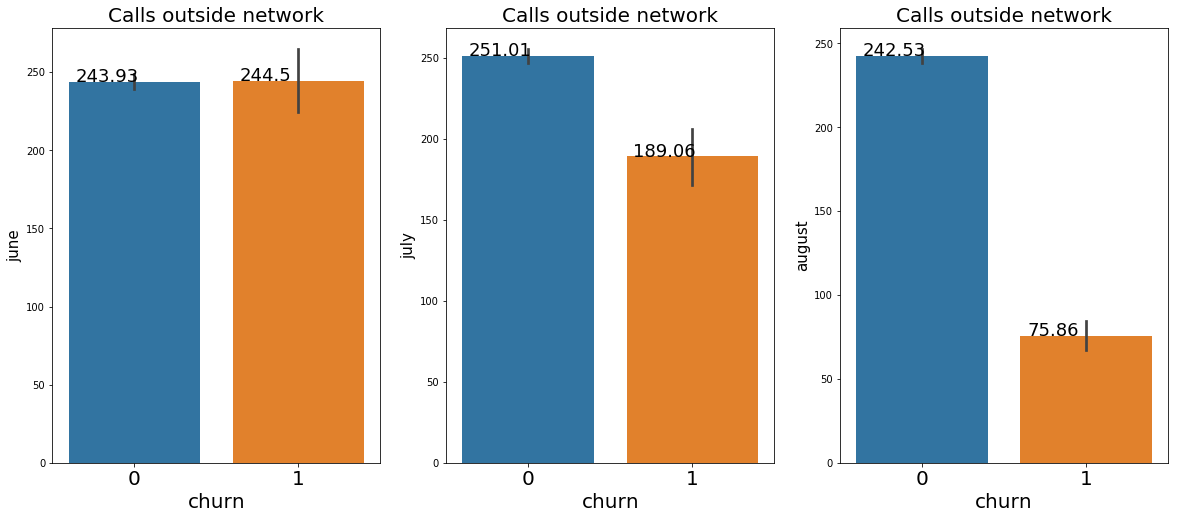

In [59]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
fig4=sns.barplot(x='churn_flag',y='offnet_mou_6',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("june",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig4.patches:
    fig4.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',rotation=0)

plt.title("Calls outside network",fontsize=20)

plt.subplot(1,3,2)
fig5=sns.barplot(x='churn_flag',y='offnet_mou_7',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("july",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig5.patches:
    fig5.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.title("Calls outside network",fontsize=20)


plt.subplot(1,3,3)
fig6=sns.barplot(x='churn_flag',y='offnet_mou_8',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("august",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig6.patches:
    fig6.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.title("Calls outside network",fontsize=20)



## sachet subsriction

In [60]:
# let's check sachet subscription for 2G/3G
sachet_2g_or_3g = telecom_hv.columns[telecom_hv.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

print(telecom_hv.loc[:,sachet_2g_or_3g].describe())



        sachet_2g_6   sachet_2g_7   sachet_2g_8   sachet_3g_6   sachet_3g_7  \
count  29947.000000  29947.000000  29947.000000  29947.000000  29947.000000   
mean       1.048619      1.176946      0.998130      0.213811      0.231442   
std        2.471038      2.690652      2.478263      0.956545      1.070245   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000      0.000000      0.000000   
max       39.000000     48.000000     44.000000     29.000000     35.000000   

        sachet_3g_8  
count  29947.000000  
mean       0.207433  
std        1.068098  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       41.000000  


In [61]:
telecom_hv.pivot_table(values=['sachet_2g_6','sachet_2g_7','sachet_2g_8'],columns='churn_flag',aggfunc=np.mean)

churn_flag,0,1
sachet_2g_6,1.054742,0.979475
sachet_2g_7,1.207081,0.836617
sachet_2g_8,1.064847,0.244663


In [62]:
telecom_hv.pivot_table(values=['sachet_3g_6','sachet_3g_7','sachet_3g_8'],columns='churn_flag',aggfunc=np.mean)

churn_flag,0,1
sachet_3g_6,0.210098,0.255747
sachet_3g_7,0.231326,0.232759
sachet_3g_8,0.219476,0.071429


### Theres a steep drop on sachet service for churned customers as compared to non churned.

In [63]:
## lets define some derived attribute
telecom_hv['sachet_2g_gp']=(telecom_hv['sachet_2g_6'] + telecom_hv['sachet_2g_7'])/2

In [64]:
telecom_hv['sachet_3g_gp']=(telecom_hv['sachet_3g_6'] + telecom_hv['sachet_3g_7'])/2

In [65]:
# now dropping original columns
telecom_hv.drop(['sachet_2g_6','sachet_2g_7','sachet_3g_6','sachet_3g_7'],axis=1,inplace=True)

In [66]:
telecom_hv.pivot_table(values=['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'],columns='churn_flag',aggfunc=np.mean)

churn_flag,0,1
vol_2g_mb_6,157.736984,154.987085
vol_2g_mb_7,159.193342,110.032438
vol_2g_mb_8,137.867883,32.262997


Text(0.5, 1.0, 'Total 2g data used')

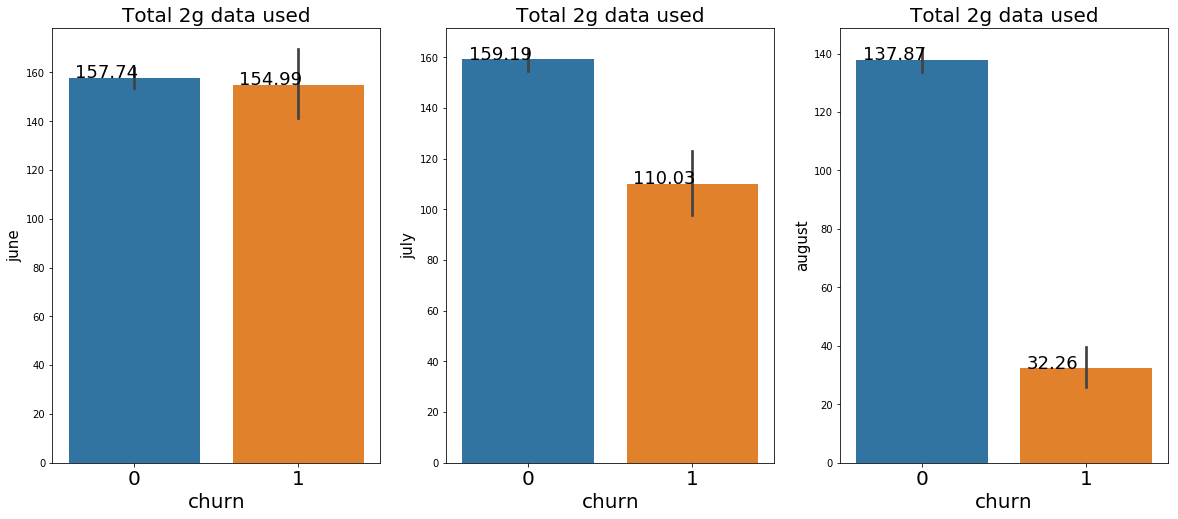

In [67]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
fig4=sns.barplot(x='churn_flag',y='vol_2g_mb_6',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("june",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig4.patches:
    fig4.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',rotation=0)

plt.title("Total 2g data used",fontsize=20)

plt.subplot(1,3,2)
fig5=sns.barplot(x='churn_flag',y='vol_2g_mb_7',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("july",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig5.patches:
    fig5.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.title("Total 2g data used",fontsize=20)


plt.subplot(1,3,3)
fig6=sns.barplot(x='churn_flag',y='vol_2g_mb_8',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("august",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig6.patches:
    fig6.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.title("Total 2g data used",fontsize=20)



In [68]:
telecom_hv.pivot_table(values=['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],columns='churn_flag',aggfunc=np.mean)

churn_flag,0,1
vol_3g_mb_6,397.360429,364.421166
vol_3g_mb_7,433.723971,267.319709
vol_3g_mb_8,430.722178,113.904060


Text(0.5, 1.0, 'Total 3g data used')

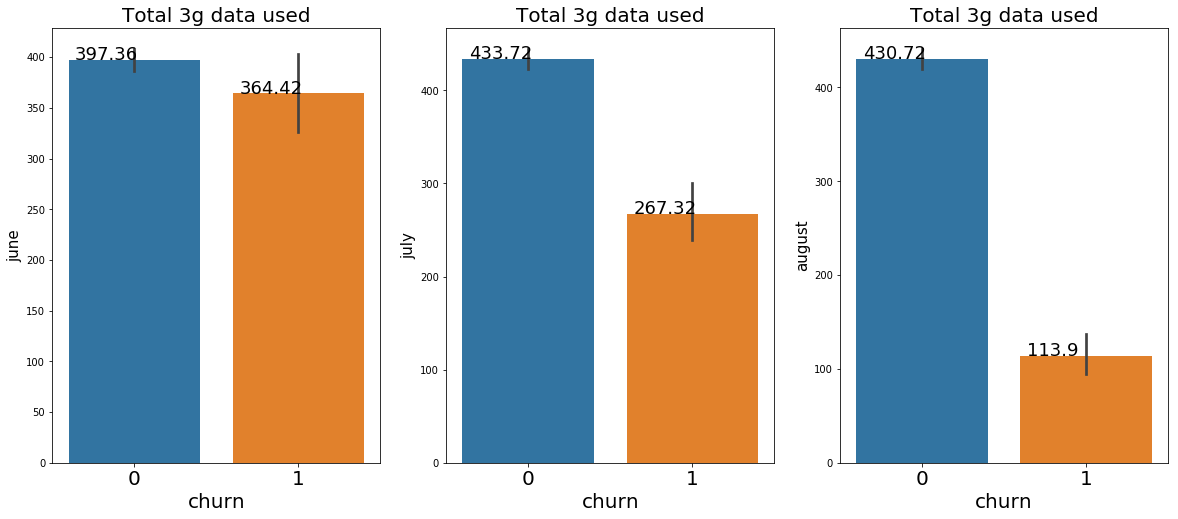

In [69]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
fig4=sns.barplot(x='churn_flag',y='vol_3g_mb_6',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("june",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig4.patches:
    fig4.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',rotation=0)

plt.title("Total 3g data used",fontsize=20)

plt.subplot(1,3,2)
fig5=sns.barplot(x='churn_flag',y='vol_3g_mb_7',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("july",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig5.patches:
    fig5.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.title("Total 3g data used",fontsize=20)


plt.subplot(1,3,3)
fig6=sns.barplot(x='churn_flag',y='vol_3g_mb_8',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("august",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig6.patches:
    fig6.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.title("Total 3g data used",fontsize=20)



In [70]:
##caluclating 2g and 3g data for 6th and 7th month.
telecom_hv['total_2g']=telecom_hv['vol_2g_mb_6']+telecom_hv['vol_2g_mb_7']
telecom_hv['total_3g']=telecom_hv['vol_3g_mb_6']+telecom_hv['vol_3g_mb_7']


In [71]:
telecom_hv.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_6','vol_3g_mb_7'],axis=1,inplace=True)

In [72]:
telecom_hv.pivot_table(values=['arpu_6','arpu_7','arpu_8'],columns='churn_flag',aggfunc=np.mean)

churn_flag,0,1
arpu_6,431.062116,460.149679
arpu_7,441.080796,367.695618
arpu_8,429.944131,177.402755


### we can see that theres a steep drop  in avg revenue of churned customers month to month bais.

Text(0.5, 1.0, 'Average Revenue')

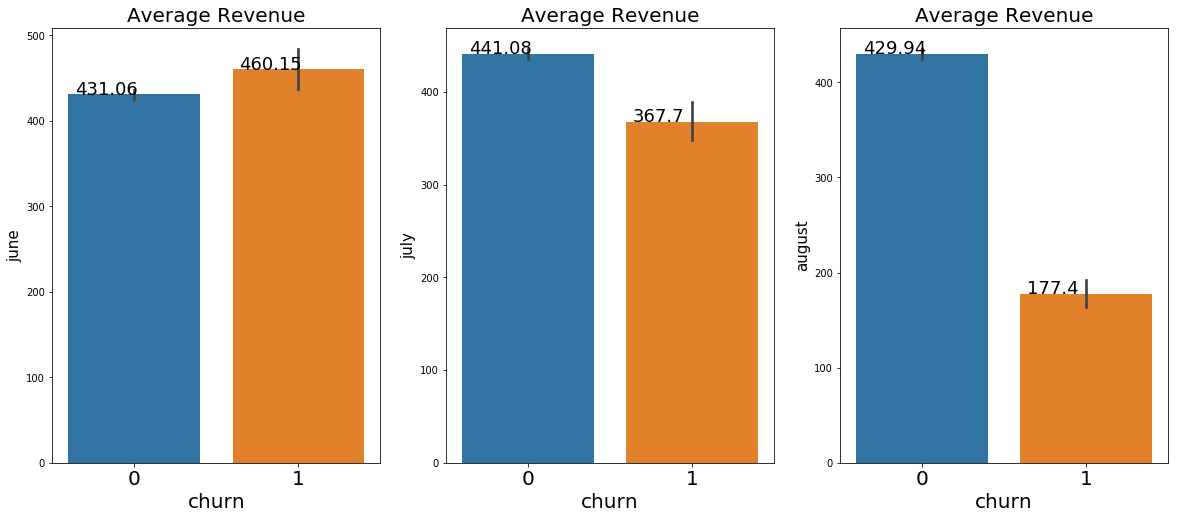

In [73]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
fig4=sns.barplot(x='churn_flag',y='arpu_6',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("june",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig4.patches:
    fig4.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',rotation=0)

plt.title("Average Revenue",fontsize=20)

plt.subplot(1,3,2)
fig5=sns.barplot(x='churn_flag',y='arpu_7',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("july",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig5.patches:
    fig5.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.title("Average Revenue",fontsize=20)


plt.subplot(1,3,3)
fig6=sns.barplot(x='churn_flag',y='arpu_8',estimator=np.mean,data=telecom_hv)
plt.xlabel("churn",fontsize=20)
plt.ylabel("august",fontsize=15)
plt.rcParams['xtick.labelsize']=20
for i in fig6.patches:
    fig6.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.title("Average Revenue",fontsize=20)



### same can be visualized from a plot.

## Deriving new features for data columns 


In [74]:
telecom_hv['date_of_last_rech_6'] = pd.to_datetime(telecom_hv['date_of_last_rech_6'])
telecom_hv['date_of_last_rech_7'] = pd.to_datetime(telecom_hv['date_of_last_rech_7'])
telecom_hv['date_of_last_rech_8'] = pd.to_datetime(telecom_hv['date_of_last_rech_8'])

In [75]:
telecom_hv['last_date_of_month_7']= pd.to_datetime(telecom_hv['last_date_of_month_7'])
telecom_hv['last_date_of_month_8']= pd.to_datetime(telecom_hv['last_date_of_month_8'])


In [76]:
telecom_hv['last_date_of_month_7'] =telecom_hv['last_date_of_month_7'].dt.day
telecom_hv['last_date_of_month_8'] =telecom_hv['last_date_of_month_8'].dt.day


In [77]:
telecom_hv['mobile_number']=telecom_hv['mobile_number'].astype(str)

In [78]:
telecom_hv['date_of_last_rech_day_6'] =telecom_hv['date_of_last_rech_6'].dt.day
telecom_hv['date_of_last_rech_day_7'] =telecom_hv['date_of_last_rech_7'].dt.day
telecom_hv['date_of_last_rech_day_8'] =telecom_hv['date_of_last_rech_8'].dt.day

### helps in analysing whether a particular day is creating problems.

In [79]:
#telecom_hv.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)

In [80]:
telecom_hv['aon']

0         968
1        1006
7         802
8         315
9         902
19       1104
23        604
26        766
33       1328
34       1587
39        424
40       2202
41       2010
44       2715
47       3105
48       1265
51        376
52        889
53        697
56        729
57       3106
61       1131
63       1535
64       2742
67       1158
73       2283
77       1894
86        465
87       3201
92       3226
         ... 
99906    3104
99907    2789
99911    3332
99921     560
99923     198
99925     485
99927    2333
99929    2349
99931    2894
99935    1929
99938     614
99941    1661
99942    1214
99943     224
99947    2529
99955     239
99957    1214
99959    1923
99968     624
99969    2353
99970    1022
99973    2669
99981     473
99982    1197
99984     820
99985    2384
99986    2696
99988     328
99997     478
99998     751
Name: aon, Length: 29947, dtype: int64

## Bivariate analysis.

In [81]:
cor = telecom_hv.corr()


In [82]:
## correlations of highly correlated columns.
corr_unstack=cor.abs().unstack()
corr_unstack.sort_values(ascending=False)

date_of_last_rech_day_8  date_of_last_rech_day_8    1.000000
std_ic_t2m_mou_7         std_ic_t2m_mou_7           1.000000
total_rech_num_7         total_rech_num_7           1.000000
total_rech_num_8         total_rech_num_8           1.000000
total_rech_amt_6         total_rech_amt_6           1.000000
total_rech_amt_7         total_rech_amt_7           1.000000
total_rech_amt_8         total_rech_amt_8           1.000000
max_rech_amt_6           max_rech_amt_6             1.000000
max_rech_amt_7           max_rech_amt_7             1.000000
max_rech_amt_8           max_rech_amt_8             1.000000
last_day_rch_amt_6       last_day_rch_amt_6         1.000000
last_day_rch_amt_7       last_day_rch_amt_7         1.000000
last_day_rch_amt_8       last_day_rch_amt_8         1.000000
total_rech_data_6        total_rech_data_6          1.000000
total_rech_data_7        total_rech_data_7          1.000000
total_rech_data_8        total_rech_data_8          1.000000
max_rech_data_6         

In [83]:
## lets do outlier analysis

In [84]:
telecom_hv['arpu_gp']=(telecom_hv['arpu_6']+telecom_hv['arpu_7'])/2
telecom_hv[['arpu_gp','arpu_8']].describe(percentiles=[0.75,.995,.998,.999,1.00])

,arpu_gp,arpu_8
count,29947.000000,29947.000000
mean,434.269790,409.401479
std,441.540664,491.669161
min,-749.783000,-945.808000
50%,328.719500,298.710000
75%,546.161000,535.425500
99.5%,2185.923675,2316.961980
99.8%,2876.844420,3172.798788
99.9%,3773.983841,3912.177970
100%,31438.461000,33543.624000


In [85]:
telecom_hv[telecom_hv['arpu_8']>np.percentile(telecom_hv['arpu_8'],99.95)][['arpu_gp','arpu_8','churn_flag']]

,arpu_gp,arpu_8,churn_flag
10484,5335.6455,8989.682,0
23753,1375.5390,6255.086,0
33019,9782.2630,13505.996,0
35774,4483.9280,6020.838,0
38610,31438.4610,33543.624,0
48388,7241.6360,6194.049,0
51314,15055.8865,16040.503,0
66157,4318.6465,6838.828,0
66966,2939.4335,5894.122,0
67717,14040.7470,12533.285,0


In [86]:
## as these are those customers who didint churn ,so we can remove them.
telecom_hv=telecom_hv[~(telecom_hv['arpu_8']>np.percentile(telecom_hv['arpu_8'],99.95))]

In [87]:
telecom_hv.drop(['arpu_6','arpu_7'],axis=1,inplace=True)

In [88]:
telecom_hv['arpu_gp_2g']=(telecom_hv['arpu_2g_6']+telecom_hv['arpu_2g_7'])/2
telecom_hv[['arpu_gp_2g','arpu_2g_8']].describe(percentiles=[0.75,.90,.95,.999,1.00])

,arpu_gp_2g,arpu_2g_8
count,29932.000000,29932.000000
mean,70.067050,64.657835
std,146.723731,155.611653
min,-17.915000,-55.830000
50%,5.517500,0.000000
75%,85.977500,54.462500
90%,212.170000,212.170000
95%,318.255000,362.840000
99.9%,1415.869335,1485.355600
100%,4390.540000,3483.170000


In [89]:
telecom_hv[telecom_hv['arpu_2g_8']>np.percentile(telecom_hv['arpu_2g_8'],99.95)][['arpu_gp_2g','arpu_2g_8','churn_flag']]

,arpu_gp_2g,arpu_2g_8,churn_flag
6051,1415.820,1930.37,1
13453,1391.240,2001.51,0
27531,4390.540,3467.17,0
34137,1395.285,1933.80,0
38363,1418.820,1777.35,0
46614,2546.170,1947.10,0
46998,2934.850,2139.55,0
55317,1659.545,1921.36,0
55682,1818.360,2309.37,0
65258,2513.435,2655.24,0


In [90]:
telecom_hv=telecom_hv[~(telecom_hv['arpu_2g_8']>np.percentile(telecom_hv['arpu_2g_8'],99.95))]

In [91]:
telecom_hv.drop(['arpu_2g_6','arpu_2g_7'],axis=1,inplace=True)

In [92]:
telecom_hv['arpu_gp_3g']=(telecom_hv['arpu_3g_6']+telecom_hv['arpu_3g_7'])/2
telecom_hv[['arpu_gp_3g','arpu_3g_8']].describe(percentiles=[0.75,.90,.95,.999,1.00])

,arpu_gp_3g,arpu_3g_8
count,29917.000000,29917.000000
mean,73.388346,68.655934
std,156.517674,165.218272
min,-15.410000,-24.490000
50%,0.450000,0.000000
75%,86.510000,48.740000
90%,221.344000,219.458000
95%,343.719000,392.230000
99.9%,1591.899100,1518.617800
100%,3799.980000,3716.900000


In [93]:
telecom_hv[telecom_hv['arpu_3g_8']>np.percentile(telecom_hv['arpu_3g_8'],99.95)][['arpu_gp_3g','arpu_3g_8','churn_flag']]

,arpu_gp_3g,arpu_3g_8,churn_flag
2987,1711.125,1794.03,0
32285,373.095,2004.83,0
36883,1478.365,1799.51,0
44772,395.890,1989.76,0
50303,237.700,1705.92,0
51423,487.615,1951.73,0
54573,1666.005,2460.85,0
62178,1705.055,2404.41,0
70242,1466.365,1747.47,0
77696,1064.195,1720.85,0


In [94]:
telecom_hv=telecom_hv[~(telecom_hv['arpu_3g_8']>np.percentile(telecom_hv['arpu_3g_8'],99.95))]

In [95]:
telecom_hv.drop(['arpu_3g_6','arpu_3g_7'],axis=1,inplace=True)

In [96]:
print(telecom_hv[['aon']].isnull().sum(axis=0).sort_values(ascending=False))
print(telecom_hv[['aon']].describe(percentiles=[0.75,.995,.998,.999,1.00]))

aon    0
dtype: int64
                aon
count  29902.000000
mean    1296.898569
std     1006.928313
min      180.000000
50%      928.000000
75%     2084.000000
99.5%   3651.000000
99.8%   3821.000000
99.9%   4192.000000
100%    4321.000000
max     4321.000000


In [97]:
telecom_hv=telecom_hv[~(telecom_hv['aon']>np.percentile(telecom_hv['aon'],99.95))]

In [98]:
telecom_hv['vbc_gp_3g']=(telecom_hv['jun_vbc_3g']+telecom_hv['jul_vbc_3g'])/2
telecom_hv[['vbc_gp_3g','aug_vbc_3g']].describe(percentiles=[0.75,.90,.95,.999,1.00])

,vbc_gp_3g,aug_vbc_3g
count,29888.000000,29888.000000
mean,195.733897,198.579015
std,395.581503,430.579113
min,0.000000,0.000000
50%,0.000000,0.000000
75%,239.476250,222.647500
90%,611.409500,653.519000
95%,930.383000,993.500500
99.9%,3612.459700,3767.810490
100%,6422.830000,12916.220000


In [99]:
telecom_hv[telecom_hv['aug_vbc_3g']>np.percentile(telecom_hv['aug_vbc_3g'],99.95)][['vbc_gp_3g','aug_vbc_3g','churn_flag']]

,vbc_gp_3g,aug_vbc_3g,churn_flag
7754,3251.510,5117.21,0
9621,3086.115,4803.34,0
13000,3777.610,5738.74,1
30626,1687.600,5886.86,0
31210,3299.135,6604.95,0
57524,2521.250,5053.02,0
61015,0.000,5148.27,0
62877,4250.375,6289.91,0
63137,1496.515,4741.26,0
66241,377.130,6686.88,0


In [100]:
telecom_hv=telecom_hv[~(telecom_hv['aug_vbc_3g']>np.percentile(telecom_hv['aug_vbc_3g'],99.95))]

In [101]:
telecom_hv.drop(columns=['jun_vbc_3g','jul_vbc_3g'],axis=1,inplace=True)


In [102]:
telecom_hv['loc_og_mou_6']=telecom_hv['loc_og_t2f_mou_6']+telecom_hv['loc_og_t2m_mou_6']+telecom_hv['loc_og_t2t_mou_6']+telecom_hv['loc_og_t2c_mou_6']
telecom_hv['loc_og_mou_7']=telecom_hv['loc_og_t2f_mou_7']+telecom_hv['loc_og_t2m_mou_7']+telecom_hv['loc_og_t2t_mou_7']+telecom_hv['loc_og_t2c_mou_7']
telecom_hv['loc_og_mou_8']=telecom_hv['loc_og_t2f_mou_8']+telecom_hv['loc_og_t2m_mou_8']+telecom_hv['loc_og_t2t_mou_8']+telecom_hv['loc_og_t2c_mou_8']
telecom_hv['loc_og_mou_good_phase']=(telecom_hv['loc_og_mou_6']+telecom_hv['loc_og_mou_7'])/2

In [103]:
telecom_hv.drop(columns=['loc_og_mou_6','loc_og_t2f_mou_6','loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2c_mou_6',
'loc_og_mou_7','loc_og_t2f_mou_7','loc_og_t2m_mou_7','loc_og_t2t_mou_7','loc_og_t2c_mou_7',
'loc_og_t2f_mou_8','loc_og_t2m_mou_8','loc_og_t2t_mou_8','loc_og_t2c_mou_8'],axis=1,inplace=True)

In [104]:
print(telecom_hv[~(telecom_hv['loc_og_mou_good_phase'].isnull())].groupby(['churn_flag'])['mobile_number'].count())
print(telecom_hv[telecom_hv['loc_og_mou_good_phase'].isnull()].groupby(['churn_flag'])['mobile_number'].count())

churn_flag
0    27439
1     2434
Name: mobile_number, dtype: int64
Series([], Name: mobile_number, dtype: int64)


In [105]:
print(telecom_hv[['loc_og_mou_8','loc_og_mou_good_phase']].describe(percentiles=[0.75,.90,.95,.999,1.00]))

       loc_og_mou_8  loc_og_mou_good_phase
count  29873.000000           29873.000000
mean     194.784549             204.555630
std      321.361527             321.856676
min        0.000000               0.000000
50%       83.500000              95.565000
75%      244.940000             256.555000
90%      510.344000             516.524000
95%      754.818000             762.346000
99.9%   2948.244160            3143.467800
100%   10196.820000            6004.890000
max    10196.820000            6004.890000


In [106]:
telecom_hv[telecom_hv['loc_og_mou_8']>np.percentile(telecom_hv['loc_og_mou_8'],99.95)][['loc_og_mou_8','loc_og_mou_good_phase','churn_flag']]

,loc_og_mou_8,loc_og_mou_good_phase,churn_flag
1679,4793.21,4035.920,0
2777,5083.58,3421.625,0
8596,3670.48,4311.935,0
10926,3988.15,3783.015,0
21160,3973.79,3277.085,0
26694,4219.96,3464.840,0
27493,10196.82,5576.835,0
43439,5326.59,5507.285,0
54473,4070.39,962.965,0
58269,7661.27,4817.750,0


In [107]:
telecom_hv=telecom_hv[~(telecom_hv['loc_og_mou_8']>np.percentile(telecom_hv['loc_og_mou_8'],99.00))]

In [108]:
telecom_hv['max_rech_amt_good']=(telecom_hv['max_rech_amt_6']+telecom_hv['max_rech_amt_7'])/2
telecom_hv[['max_rech_amt_good','max_rech_amt_8']].describe(percentiles=[0.75,.90,.95,.99,1.00])

,max_rech_amt_good,max_rech_amt_8
count,29574.000000,29574.000000
mean,179.183438,165.018023
std,146.291497,171.877043
min,0.000000,0.000000
50%,151.000000,150.000000
75%,215.500000,200.000000
90%,301.000000,279.000000
95%,437.500000,455.000000
99%,775.000000,850.620000
100%,3299.000000,4449.000000


In [109]:
telecom_hv[telecom_hv['max_rech_amt_8']>np.percentile(telecom_hv['max_rech_amt_8'],99)][['max_rech_amt_good',
'max_rech_amt_8','churn_flag']]

,max_rech_amt_good,max_rech_amt_8,churn_flag
7,1185.0,1580,1
1017,252.0,1000,0
1158,500.0,1000,0
1201,500.0,1098,0
1589,549.0,1000,0
1637,1000.0,1000,0
1641,580.0,1050,0
1726,584.5,899,0
2492,543.0,1050,0
2956,359.5,1000,0


In [110]:
telecom_hv=telecom_hv[~(telecom_hv['max_rech_amt_8']>np.percentile(telecom_hv['max_rech_amt_8'],99))]


In [111]:
telecom_hv['onnet_mou_good_phase']=(telecom_hv['onnet_mou_6']+telecom_hv['onnet_mou_7'])/2
telecom_hv['offnet_mou_good_phase']=(telecom_hv['offnet_mou_6']+telecom_hv['offnet_mou_7'])/2

In [112]:
print(telecom_hv[['onnet_mou_good_phase','onnet_mou_8']].describe(percentiles=[0.75,.90,.95,.99,1.00]))
print(telecom_hv[['offnet_mou_good_phase','offnet_mou_8']].describe(percentiles=[0.75,.90,.95,.99,1.00]))

       onnet_mou_good_phase   onnet_mou_8
count          29278.000000  29278.000000
mean             138.001496    124.880190
std              303.473211    301.474449
min                0.000000      0.000000
50%               36.585000     28.090000
75%              131.153750    113.460000
90%              360.093500    319.702000
95%              619.453750    571.743000
99%             1472.087850   1399.410600
100%            7331.060000   7470.360000
max             7331.060000   7470.360000
       offnet_mou_good_phase  offnet_mou_8
count           29278.000000  29278.000000
mean              234.858909    216.485704
std               359.947577    357.795994
min                 0.000000      0.000000
50%               118.807500     98.980000
75%               295.731250    273.035000
90%               580.382000    556.740000
95%               850.257250    819.568500
99%              1682.426550   1577.751500
100%             8314.795000  13547.840000
max              8314.7

In [113]:
telecom_hv=telecom_hv[~(telecom_hv['onnet_mou_8']>np.percentile(telecom_hv['onnet_mou_8'],98))]


In [114]:
telecom_hv=telecom_hv[~(telecom_hv['offnet_mou_8']>np.percentile(telecom_hv['offnet_mou_8'],98))]


In [115]:
telecom_hv.drop(['onnet_mou_6','offnet_mou_6','offnet_mou_7'],axis=1,inplace=True)

In [116]:
telecom_hv[['sachet_2g_gp','sachet_3g_gp','sachet_2g_8','sachet_3g_8']].describe(percentiles=[0.75,0.90,0.95,0.99])

,sachet_2g_gp,sachet_3g_gp,sachet_2g_8,sachet_3g_8
count,28118.000000,28118.000000,28118.000000,28118.000000
mean,1.141155,0.226439,1.019383,0.208194
std,2.427768,0.923310,2.518420,1.030620
min,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000
90%,4.000000,0.500000,4.000000,0.000000
95%,6.500000,1.000000,6.000000,1.000000
99%,11.000000,4.000000,12.000000,4.000000
max,38.000000,27.000000,44.000000,30.000000


In [117]:
telecom_hv=telecom_hv[~(telecom_hv['sachet_3g_8']>np.percentile(telecom_hv['sachet_3g_8'],99.95))]


In [118]:
telecom_hv=telecom_hv[~(telecom_hv['sachet_2g_8']>np.percentile(telecom_hv['sachet_2g_8'],99.95))]

In [119]:
telecom_hv['std_ic_mou_6']=telecom_hv['std_ic_t2f_mou_6']+telecom_hv['std_ic_t2m_mou_6']+telecom_hv['std_ic_t2t_mou_6']
telecom_hv['std_ic_mou_7']=telecom_hv['std_ic_t2f_mou_6']+telecom_hv['std_ic_t2m_mou_6']+telecom_hv['std_ic_t2t_mou_6']
telecom_hv['std_ic_mou_8']=telecom_hv['std_ic_t2f_mou_8']+telecom_hv['std_ic_t2m_mou_8']+telecom_hv['std_ic_t2t_mou_8']
telecom_hv['std_ic_mou_good_phase']=(telecom_hv['std_ic_mou_6']+telecom_hv['std_ic_mou_7'])/2

In [120]:
telecom_hv[['std_ic_mou_good_phase','std_ic_mou_8']].describe(percentiles=[0.75,.90,.95,.99,0.999,1.00])

,std_ic_mou_good_phase,std_ic_mou_8
count,28089.000000,28089.000000
mean,36.983408,34.950791
std,114.231727,110.115287
min,0.000000,0.000000
50%,5.380000,4.300000
75%,29.080000,27.010000
90%,87.710000,81.956000
95%,161.242000,154.438000
99%,481.121200,465.328800
99.9%,1513.389040,1393.844080


In [121]:
telecom_hv=telecom_hv[~(telecom_hv['std_ic_mou_8']>np.percentile(telecom_hv['std_ic_mou_8'],99.95))]

In [122]:
telecom_hv.drop(columns=['std_ic_mou_6','std_ic_mou_7','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2m_mou_6',
'std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8'],axis=1,inplace=True)

In [123]:
telecom_hv['roam_ic_mou_good_phase']=(telecom_hv['roam_ic_mou_6']+telecom_hv['roam_ic_mou_7'])/2

In [124]:
telecom_hv[['roam_ic_mou_good_phase','roam_ic_mou_8']].describe(percentiles=[0.75,.90,.95,.99,0.999,1.00])

,roam_ic_mou_good_phase,roam_ic_mou_8
count,28074.000000,28074.000000
mean,10.490533,9.611089
std,54.248009,64.557507
min,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
90%,18.099000,7.724000
95%,50.957000,37.120500
99%,200.940400,219.094000
99.9%,720.685790,819.383590


In [125]:
telecom_hv=telecom_hv[~(telecom_hv['roam_ic_mou_8']>np.percentile(telecom_hv['roam_ic_mou_8'],99.95))]

In [126]:
telecom_hv.drop(['roam_ic_mou_6','roam_ic_mou_7'],axis=1,inplace=True)

In [127]:
telecom_hv['spl_ic_mou_good_phase']=(telecom_hv['spl_ic_mou_6']+telecom_hv['spl_ic_mou_7'])/2

In [128]:
telecom_hv[['spl_ic_mou_good_phase','spl_ic_mou_8']].describe(percentiles=[0.75,.90,.95,.99,0.999,1.00])

,spl_ic_mou_good_phase,spl_ic_mou_8
count,28059.000000,28059.000000
mean,0.037025,0.022958
std,0.150962,0.105798
min,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
90%,0.140000,0.000000
95%,0.225000,0.210000
99%,0.410000,0.500000
99.9%,0.704710,0.810000


In [129]:
telecom_hv=telecom_hv[~(telecom_hv['roam_ic_mou_8']>np.percentile(telecom_hv['roam_ic_mou_8'],99.95))]

In [130]:
telecom_hv['total_ic_mou_good']=(telecom_hv['total_ic_mou_6']+telecom_hv['total_ic_mou_7'])/2

In [131]:
telecom_hv['std_og_mou_6']=telecom_hv['std_og_t2f_mou_6']+telecom_hv['std_og_t2m_mou_6']+telecom_hv['std_og_t2t_mou_6']
telecom_hv['std_og_mou_7']=telecom_hv['std_og_t2f_mou_6']+telecom_hv['std_og_t2m_mou_6']+telecom_hv['std_og_t2t_mou_6']
telecom_hv['std_og_mou_8']=telecom_hv['std_og_t2f_mou_8']+telecom_hv['std_og_t2m_mou_8']+telecom_hv['std_og_t2t_mou_8']
telecom_hv['std_og_mou_good_phase']=(telecom_hv['std_og_mou_6']+telecom_hv['std_og_mou_7'])/2


In [132]:
telecom_hv[['std_og_mou_good_phase','std_og_mou_8']].describe(percentiles=[0.75,.90,.95,.99,0.999,1.00])

,std_og_mou_good_phase,std_og_mou_8
count,28044.000000,28044.000000
mean,120.391801,89.069283
std,319.427685,200.979919
min,0.000000,0.000000
50%,4.590000,2.360000
75%,77.945000,59.440000
90%,366.012000,308.269000
95%,638.727000,541.977000
99%,1511.696300,974.634000
99.9%,3414.519910,1434.502980


In [133]:
telecom_hv=telecom_hv[~(telecom_hv['std_og_mou_8']>np.percentile(telecom_hv['std_og_mou_8'],99.95))]

In [134]:
telecom_hv.drop(columns=['std_og_mou_6','std_og_mou_7','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2m_mou_6',
                 'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8'],axis=1,inplace=True)

In [135]:
telecom_hv['roam_og_mou_good_phase']=(telecom_hv['roam_og_mou_6']+telecom_hv['roam_og_mou_7'])/2

In [136]:
telecom_hv[['roam_og_mou_good_phase','roam_og_mou_8']].describe(percentiles=[0.75,.90,.95,.99,0.999,1.00])

,roam_og_mou_good_phase,roam_og_mou_8
count,28029.000000,28029.000000
mean,13.790020,11.283963
std,64.822956,60.977110
min,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
90%,26.026000,9.432000
95%,69.333000,53.560000
99%,263.397200,267.918000
99.9%,917.954600,879.150000


In [137]:
telecom_hv=telecom_hv[~(telecom_hv['roam_og_mou_8']>np.percentile(telecom_hv['std_og_mou_8'],99.95))]

In [138]:
telecom_hv.drop(['roam_og_mou_6','roam_og_mou_7'],axis=1,inplace=True)

In [139]:
telecom_hv['spl_og_mou_good_phase']=(telecom_hv['spl_og_mou_6']+telecom_hv['spl_og_mou_7'])/2

In [140]:
telecom_hv[['spl_og_mou_good_phase','spl_og_mou_8']].describe(percentiles=[0.75,.90,.95,.99,0.999,1.00])

,spl_og_mou_good_phase,spl_og_mou_8
count,28028.000000,28028.000000
mean,4.406253,4.400548
std,10.714217,13.231668
min,0.000000,0.000000
50%,0.650000,0.000000
75%,4.725000,3.550000
90%,12.320000,12.560000
95%,19.830000,21.956500
99%,45.385000,52.974600
99.9%,112.454190,157.355440


In [141]:
telecom_hv[telecom_hv['spl_og_mou_8']>np.percentile(telecom_hv['spl_og_mou_8'],99.96)][['spl_og_mou_good_phase','spl_og_mou_8','churn_flag']]


,spl_og_mou_good_phase,spl_og_mou_8,churn_flag
103,207.990,295.64,0
6638,440.755,531.14,0
9984,285.725,437.48,0
33376,98.845,325.14,0
33944,115.445,311.01,0
36315,180.485,240.03,0
44536,23.910,400.51,0
58124,262.780,296.84,0
75847,2.880,247.46,0
80860,282.705,303.79,0


In [142]:
telecom_hv=telecom_hv[~(telecom_hv['spl_og_mou_8']>np.percentile(telecom_hv['spl_og_mou_8'],99.95))]

In [143]:
telecom_hv['og_others_good_phase']=telecom_hv['og_others_6']+telecom_hv['og_others_7']

In [144]:
telecom_hv[['og_others_good_phase','og_others_8']].describe(percentiles=[0.75,.90,.95,.99,0.999,1.00])

,og_others_good_phase,og_others_8
count,28013.000000,28013.000000
mean,0.361482,0.033357
std,3.082968,1.743915
min,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
90%,0.930000,0.000000
95%,2.060000,0.000000
99%,5.488800,0.000000
99.9%,14.903400,4.138200


In [145]:
telecom_hv=telecom_hv[~(telecom_hv['og_others_8']>np.percentile(telecom_hv['og_others_8'],99))]

In [146]:
telecom_hv.drop(['og_others_6','og_others_7'],axis=1,inplace=True)

In [147]:
telecom_hv['isd_og_mou_good_phase']=telecom_hv['isd_og_mou_6']+telecom_hv['isd_og_mou_7']

In [148]:
telecom_hv[['isd_og_mou_good_phase','isd_og_mou_8']].describe(percentiles=[0.75,.90,.95,.99,0.999,1.00])

,isd_og_mou_good_phase,isd_og_mou_8
count,27890.000000,27890.000000
mean,2.376745,1.016900
std,28.110562,14.342695
min,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
90%,0.050000,0.000000
95%,2.050000,0.180000
99%,45.145000,13.965500
99.9%,372.249920,230.404350


In [149]:
telecom_hv=telecom_hv[~(telecom_hv['isd_og_mou_8']>np.percentile(telecom_hv['isd_og_mou_8'],99))]

In [150]:
telecom_hv.drop(columns=['isd_og_mou_6','isd_og_mou_7'],axis=1,inplace=True)

In [151]:
telecom_hv['av_rech_amt_data_good_phase']=(telecom_hv['av_rech_amt_data_6']+telecom_hv['av_rech_amt_data_7'])/2

In [152]:
telecom_hv[['av_rech_amt_data_good_phase','av_rech_amt_data_8']].describe(percentiles=[0.75,.90,.95,.99,0.999,1.00])

,av_rech_amt_data_good_phase,av_rech_amt_data_8
count,27611.000000,27611.000000
mean,159.390521,140.629112
std,155.894932,178.727751
min,0.000000,0.000000
50%,137.000000,100.000000
75%,215.500000,200.000000
90%,308.000000,327.000000
95%,405.000000,483.000000
99%,756.000000,756.000000
99.9%,1391.450000,1411.560000


In [153]:
telecom_hv=telecom_hv[~(telecom_hv['av_rech_amt_data_8']>np.percentile(telecom_hv['av_rech_amt_data_8'],99))]

In [154]:
telecom_hv.drop(['av_rech_amt_data_6','av_rech_amt_data_7'],axis=1,inplace=True)

In [155]:
telecom_hv['av_rech_amt_good_phase']=(telecom_hv['total_rech_amt_6']+telecom_hv['total_rech_amt_7'])/(telecom_hv['total_rech_num_6']+telecom_hv['total_rech_num_7'])

In [156]:
telecom_hv['avg_rech_amt_8']=telecom_hv['total_rech_amt_8']/telecom_hv['total_rech_num_8']

In [157]:
telecom_hv[['av_rech_amt_good_phase','avg_rech_amt_8']].describe(percentiles=[0.75,.90,.95,.99,0.999,1.00])

,av_rech_amt_good_phase,avg_rech_amt_8
count,27335.000000,26245.000000
mean,75.075234,78.893995
std,61.180774,76.230763
min,0.000000,0.000000
50%,62.000000,60.500000
75%,99.375000,110.000000
90%,135.875000,166.135714
95%,171.250000,223.733333
99%,286.012857,350.000000
99.9%,669.108667,565.000000


In [158]:
telecom_hv=telecom_hv[~(telecom_hv['avg_rech_amt_8']>np.percentile(telecom_hv['avg_rech_amt_8'],99))]

In [159]:
telecom_hv['avg_rech_amt_8'].fillna(0,inplace=True)

In [160]:
telecom_hv.drop(['total_rech_amt_6','total_rech_amt_7','total_rech_num_6','total_rech_num_7'],axis=1,inplace=True)

In [161]:
cols=telecom_hv.columns
telecom_hv[cols]=telecom_hv[cols].apply(pd.to_numeric,errors='coerce')

# Model Building.

In [162]:
X= telecom_hv.drop(['churn_flag'],axis=1)
Y = telecom_hv['churn_flag']


In [163]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [164]:
X_train,X_test,Y_train,Y_test=train_test_split(X_std,Y,train_size=0.8,test_size=0.2,random_state=111)

In [165]:
print("Training dataset size",X_train.shape)
print("Training dataset target size",Y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",Y_test.shape)

Training dataset size (21868, 109)
Training dataset target size (21868,)
Test dataset size (5467, 109)
Test dataset target size (5467,)


# P.C.A

### As we have large dataset with many variables ,it is vey difficult to build a model with these ,so applying P.C.A  for dimensionality reduction.

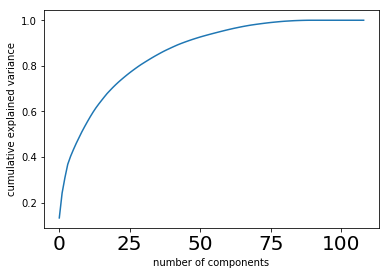

In [166]:
# Apply PCA on the Sampled data and Run logistic Regression
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [167]:
pca_final=PCA(0.90)

In [168]:
df_train_pca=pca_final.fit_transform(X_train)
df_train_pca.shape

(21868, 45)

## To explain 90 % variance 45 componenets will be enough.

In [169]:
pca.components_

array([[ 2.82573849e-02,  2.68859166e-02,  3.12243168e-02, ...,
         7.70099732e-02,  1.09968385e-01,  1.33128550e-01],
       [-2.56104428e-02,  7.86331660e-03,  9.69012408e-03, ...,
         2.30611899e-01, -2.74270570e-02,  1.06940117e-02],
       [-2.84046410e-02,  5.01636333e-02,  5.55743809e-02, ...,
         8.22174341e-02, -2.48757042e-01, -1.43259195e-01],
       ...,
       [-0.00000000e+00, -1.19695920e-16,  9.66884215e-18, ...,
         2.93834831e-01, -2.91397277e-01, -3.46944695e-17],
       [ 0.00000000e+00, -2.16704242e-17,  5.19216630e-17, ...,
         6.34965191e-01,  4.17108031e-02,  7.63278329e-17],
       [ 0.00000000e+00, -4.94524746e-17, -2.77892071e-17, ...,
         9.45368057e-02,  6.41740011e-01, -3.46944695e-18]])

In [170]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.028257,-0.025610,mobile_number
1,0.026886,0.007863,last_date_of_month_7
2,0.031224,0.009690,last_date_of_month_8
3,0.200348,-0.001109,arpu_8
4,0.097428,-0.095011,onnet_mou_7


In [171]:
pca.explained_variance_ratio_

array([1.33390289e-01, 1.09089574e-01, 6.75535926e-02, 5.83818074e-02,
       3.47850483e-02, 2.93212709e-02, 2.75369271e-02, 2.53583739e-02,
       2.52517352e-02, 2.30651831e-02, 2.22138967e-02, 2.13123748e-02,
       2.01441460e-02, 1.85477523e-02, 1.67327556e-02, 1.58732993e-02,
       1.56104499e-02, 1.50515718e-02, 1.30897303e-02, 1.28963740e-02,
       1.21237950e-02, 1.14752032e-02, 1.08117041e-02, 1.04491325e-02,
       1.01473718e-02, 9.78549417e-03, 9.31658729e-03, 9.06302148e-03,
       8.84178615e-03, 8.40782615e-03, 7.79200776e-03, 7.71929660e-03,
       7.55556636e-03, 7.41128362e-03, 7.16190067e-03, 6.88294171e-03,
       6.77834994e-03, 6.53291341e-03, 6.09956108e-03, 5.78101791e-03,
       5.75901514e-03, 5.57936270e-03, 5.45810361e-03, 4.94548739e-03,
       4.66782780e-03, 4.52110140e-03, 4.36930236e-03, 4.22444822e-03,
       4.01759512e-03, 3.87878446e-03, 3.80161621e-03, 3.54788139e-03,
       3.43785001e-03, 3.38295854e-03, 3.28370364e-03, 3.23297763e-03,
      

In [172]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

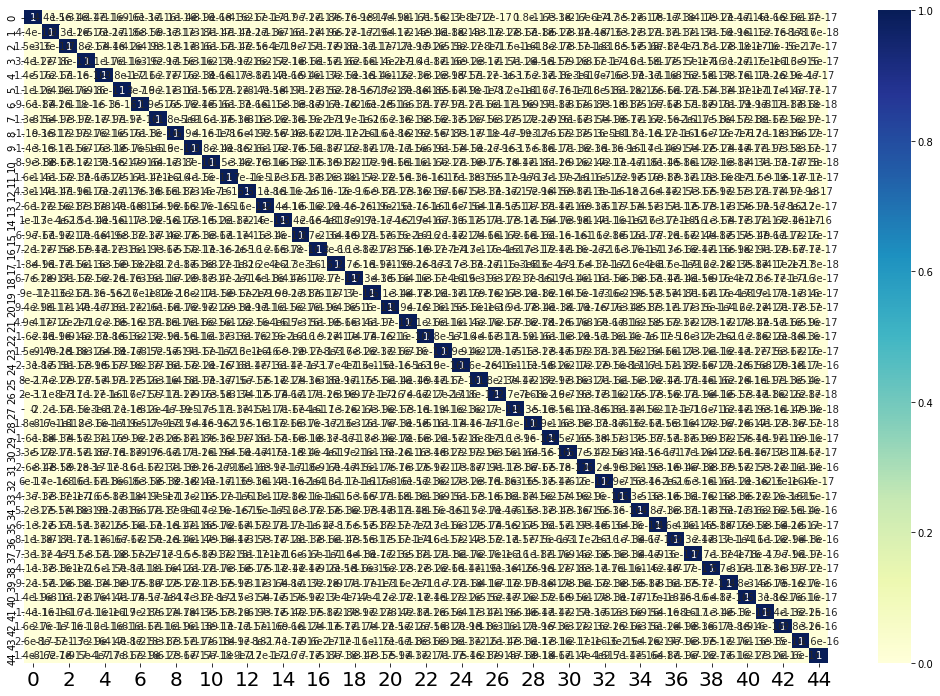

In [173]:
plt.figure(figsize=(18,12))
sns.heatmap(corrmat,cmap='YlGnBu',annot=True)

In [174]:
corrmat_cor = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_cor.max(), ", min corr: ", corrmat_cor.min(),)

max corr: 9.356759963456813e-16 , min corr:  -1.3075402723792507e-15


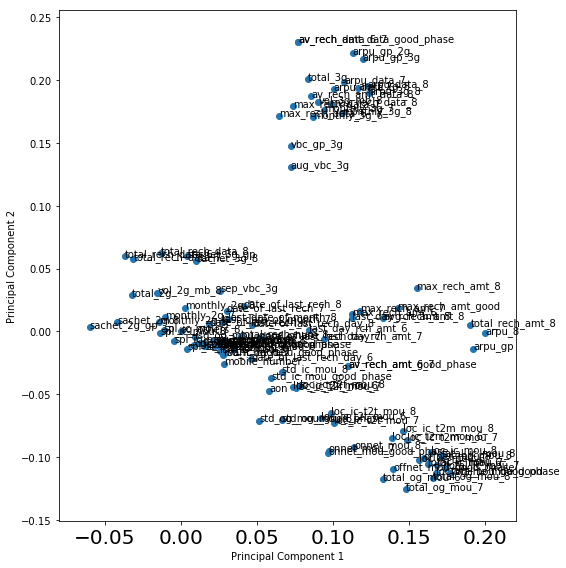

In [175]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [176]:
#Applying selected components to the test data 
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(5467, 45)

# LOGISTIC REGRESSION.

In [177]:
## to overcome the problem of class imbalance we use SMOTE method to make sure that resulys are not biased
from imblearn.over_sampling import SMOTE


In [178]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, Y_train_res = sm.fit_sample(df_train_pca, Y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res==0)))

Before OverSampling, counts of label '1': 1851
Before OverSampling, counts of label '0': 20017 

After OverSampling, the shape of train_X: (40034, 45)
After OverSampling, the shape of train_y: (40034,) 

After OverSampling, counts of label '1': 20017
After OverSampling, counts of label '0': 20017


In [179]:
#Tuning Hyperparameter C values for LR

parameters={'C':[0.0001,0.001,0.01,0.1,1,10,100,1000]}
folds=KFold(n_splits=5,shuffle=True,random_state=5)
lr=LogisticRegression()


#Applying GridsearchCV on Logistic regression using KFold
#Using scoring=recall as we dont want to predict churn customers as non-churn
clf = GridSearchCV(lr, param_grid=parameters, cv=folds, verbose=5, n_jobs=3, scoring='recall')
clf.fit(X_train_res, Y_train_res)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    4.2s
[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:   11.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=5, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=3,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=5)

In [180]:
clf.best_params_

{'C': 0.0001}

In [181]:
lr1 = LogisticRegression(C=100, verbose=5)
model_lr=lr1.fit(X_train_res, Y_train_res)

[LibLinear]

# logistic Regression Metrics.

In [182]:
# Roc curve function
def roc_func(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr,tpr,thresholds

In [183]:
# metrics function
from sklearn.metrics import confusion_matrix
    
def eval_metrics(true,pred):
    metric_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

    # confusion matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives

    num = [0]
    for i in num:
        cm1 = metrics.confusion_matrix(true,pred)
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1

        specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        metric_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
    print(metric_df)

    
    #roc curve
    roc_func(true,pred)
    return

## Evaluating metrics on training data

   prob  accuracy  sensitivity  specificity
0   0.0  0.842234     0.856722     0.827746


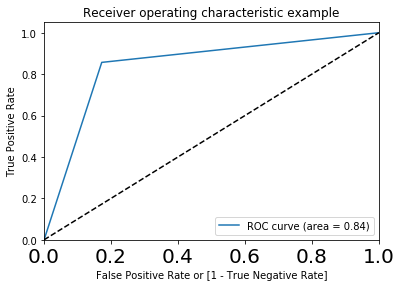

In [184]:
Y_train_pred=model_lr.predict(X_train_res)
eval_metrics(Y_train_res, Y_train_pred)

## Logistic regression meterics evaluation on test data

   prob  accuracy  sensitivity  specificity
0   0.0  0.829888     0.831933     0.829693


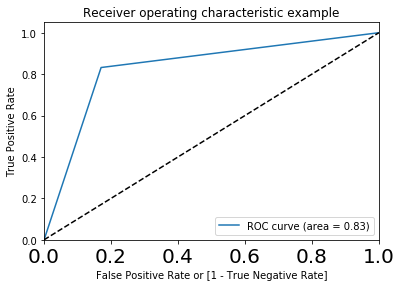

In [185]:
#Predicting the model on test data
Y_test_pred=model_lr.predict(df_test_pca)
eval_metrics(Y_test, Y_test_pred)

In [186]:
# Predicted probabilities
Y_pred_train_prob = model_lr.predict_proba(X_train_res)
# Converting y_pred_train_prob to a dataframe which is an array
Y_pred_train_df = pd.DataFrame(Y_pred_train_prob)
# Converting to column dataframe
Y_pred_train = Y_pred_train_df.iloc[:,[1]]

# Converting y_train to dataframe
Y_train_df = pd.DataFrame(Y_train_res)
# Putting ID to index
Y_train_df['ID'] = Y_train_df.index

# Removing index for both dataframes to append them side by side 
Y_pred_train.reset_index(drop=True, inplace=True)
Y_train_df.reset_index(drop=True, inplace=True)


# Appending Y_train_df and Y_pred_train
Y_pred_train_final = pd.concat([Y_train_df,Y_pred_train],axis=1)
# Renaming the column 
Y_pred_train_final= Y_pred_train_final.rename(columns={ 1 : 'Churn_Prob'})
Y_pred_train_final= Y_pred_train_final.rename(columns={ 0 : 'Churn'})


# Rearranging the columns
Y_pred_train_final = Y_pred_train_final.reindex_axis(['ID','Churn','Churn_Prob'], axis=1)

# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
Y_pred_train_final['predicted'] =Y_pred_train_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
Y_pred_train_final.head()

,ID,Churn,Churn_Prob,predicted
0,0,0,0.061148,0
1,1,1,0.628662,1
2,2,0,0.563359,1
3,3,0,0.546668,1
4,4,0,0.156621,0


In [187]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_pred_train_final[i]= Y_pred_train_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
Y_pred_train_final.head()

,ID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,0.061148,0,1,0,0,0,0,0,0,0,0,0
1,1,1,0.628662,1,1,1,1,1,1,1,1,0,0,0
2,2,0,0.563359,1,1,1,1,1,1,1,0,0,0,0
3,3,0,0.546668,1,1,1,1,1,1,1,0,0,0,0
4,4,0,0.156621,0,1,1,0,0,0,0,0,0,0,0


In [188]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( Y_pred_train_final.Churn, Y_pred_train_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.711270  0.976220  0.446321
0.2   0.2  0.772493  0.953889  0.591098
0.3   0.3  0.811260  0.929810  0.692711
0.4   0.4  0.831443  0.897137  0.765749
0.5   0.5  0.842234  0.856722  0.827746
0.6   0.6  0.845306  0.810711  0.879902
0.7   0.7  0.831843  0.741869  0.921816
0.8   0.8  0.780836  0.604136  0.957536
0.9   0.9  0.656242  0.325973  0.986511


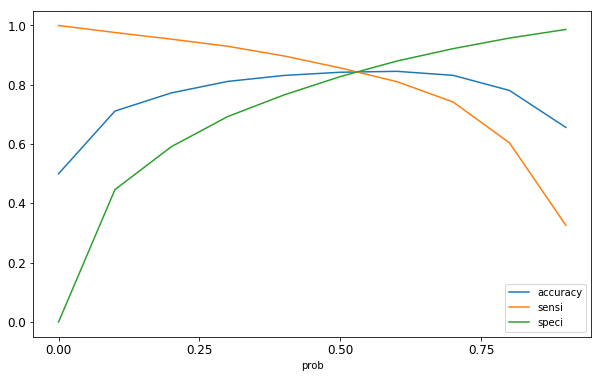

In [189]:

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.25), size = 12)
plt.yticks(size = 12)
plt.show()


In [190]:
## cutoff probability comes to 0.55 and taking it as a threshold probablity
Y_pred_train_final['final_Predicted']= Y_pred_train_final.Churn_Prob.map( lambda x: 1 if x > 0.55 else 0)

   prob  accuracy  sensitivity  specificity
0   0.0  0.845282      0.83489     0.855673


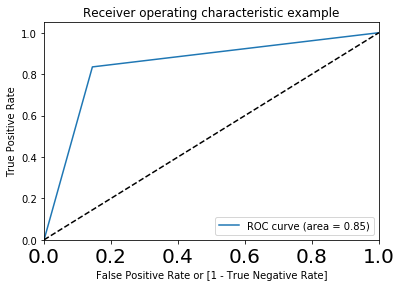

In [191]:
eval_metrics(Y_pred_train_final.Churn,Y_pred_train_final.final_Predicted)

## Now probablities for test dataset --

In [192]:
# Predicted probabilities
Y_pred_test_prob = model_lr.predict_proba(df_test_pca)
# Converting y_pred_test_prob to a dataframe which is an array
Y_pred_test_df = pd.DataFrame(Y_pred_test_prob)
# Converting to column dataframe
Y_pred_test = Y_pred_test_df.iloc[:,[1]]

# Converting y_test to dataframe
Y_test_df = pd.DataFrame(Y_test)
# Putting ID to index
Y_test_df['ID'] = Y_test_df.index

# Removing index for both dataframes to append them side by side 
Y_pred_test.reset_index(drop=True, inplace=True)
Y_test_df.reset_index(drop=True, inplace=True)


# Appending y_train_df and y_pred_train
Y_pred_test_final = pd.concat([Y_test_df,Y_pred_test],axis=1)
# Renaming the column 
Y_pred_test_final= Y_pred_test_final.rename(columns={ 1 : 'Churn_Prob'})

In [193]:
#Y_pred_test_final['final_prediction']
Y_pred_test_final['final_Prediction']= Y_pred_test_final.Churn_Prob.map( lambda x: 1 if x > 0.55 else 0)

   prob  accuracy  sensitivity  specificity
0   0.0  0.849095     0.804622     0.853336


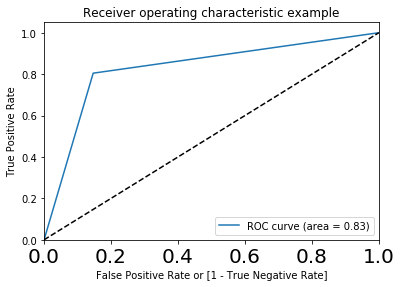

In [194]:
eval_metrics(Y_pred_test_final.churn_flag, Y_pred_test_final.final_Prediction)

In [195]:
# SVM

In [196]:
from sklearn import svm

# a simple SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')

# fit
svm_linear.fit(X_train_res, Y_train_res)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

   prob  accuracy  sensitivity  specificity
0   0.0  0.842234     0.856722     0.827746


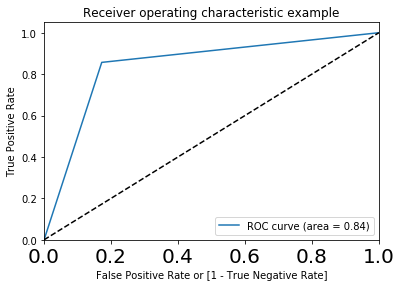

In [197]:
#Predicting the linear svm model on training data
y_train_pred=svm_linear.predict(X_train_res)
eval_metrics(Y_train_res, Y_train_pred)

   prob  accuracy  sensitivity  specificity
0   0.0  0.837754     0.834034     0.838109


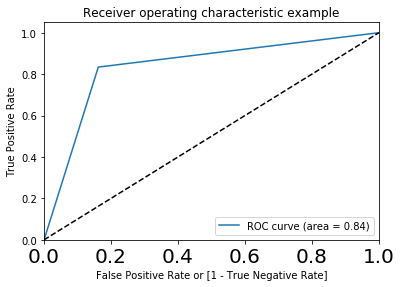

In [198]:
#Predicting the linear svm model on test data
Y_test_pred=svm_linear.predict(df_test_pca)
eval_metrics(Y_test, Y_test_pred)

In [199]:
# running gc.collect to free up memory
import gc
gc.collect()

16049

In [200]:
# accuracy
print("accuracy", metrics.accuracy_score(Y_test, Y_test_pred))

# precision
print("precision", metrics.precision_score(Y_test, Y_test_pred))

# recall/sensitivity
print("recall", metrics.recall_score(Y_test, Y_test_pred))

accuracy 0.8377537955002744
precision 0.32946058091286307
recall 0.8340336134453782


In [201]:
## Tuning hyperparameters
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = SVC(C = 10)

In [202]:
# computing the cross-validation scores 
# note that the argument cv takes the 'folds' object, and
# we have specified 'accuracy' as the metric
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(model, X_train_res, Y_train_res, cv = folds, scoring = 'recall')

In [203]:
print(cv_results)
print("mean recall={}".format(cv_results.mean()))

[0.98993711 0.99432379 0.99263586 0.99448483 0.99606202]
mean recall=0.9934887219660767


In [204]:
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                    return_train_score=True)

In [205]:
# fit the model - it will fit 5 folds across all values of C
model_cv.fit(X_train_res, Y_train_res)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 91.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1, param_grid={'C': [0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall', verbose=1)

In [206]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,128.317599,0.500718,19.508195,0.295760,0.1,{'C': 0.1},0.868679,0.867966,0.876333,0.871898,...,0.870394,0.003384,5,0.879940,0.876981,0.877667,0.878151,0.873825,0.877313,0.002000
1,161.767153,11.593358,14.478637,0.244449,1,{'C': 1},0.960252,0.964956,0.964957,0.965154,...,0.965009,0.002997,4,0.972011,0.971124,0.971391,0.972548,0.971669,0.971749,0.000496
2,209.072219,21.665545,9.615742,0.114748,10,{'C': 10},0.989937,0.994324,0.992636,0.994485,...,0.993489,0.002081,3,0.996883,0.997557,0.997637,0.997629,0.997618,0.997465,0.000292
3,2455.070882,1789.475058,8.060190,2.375926,100,{'C': 100},0.995220,0.997285,0.995175,0.997242,...,0.996542,0.001114,1,0.999938,1.000000,1.000000,1.000000,1.000000,0.999988,0.000025
4,290.173466,29.489978,5.741890,0.805650,1000,{'C': 1000},0.993711,0.993337,0.994667,0.996490,...,0.994853,0.001248,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


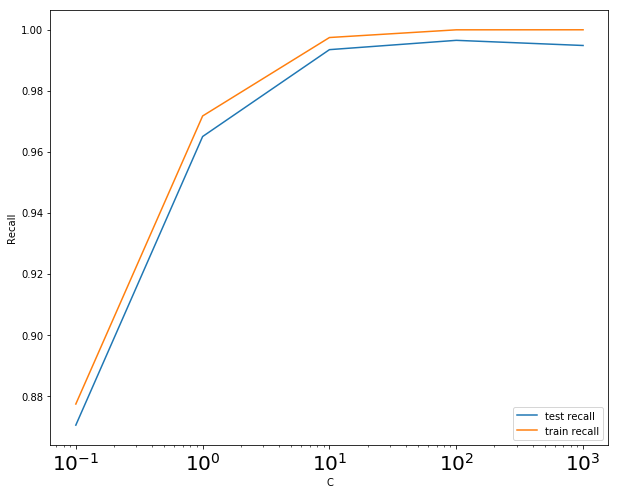

In [207]:
# plot of C versus train and test scores

plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test recall', 'train recall'], loc='lower right')
plt.xscale('log')

In [208]:
best_score=model_cv.best_score_
best_C=model_cv.best_params_['C']
print("The highest accuacy is {0} at C={1}".format(best_score,best_C))

The highest accuacy is 0.9965415564449938 at C=100


In [209]:
# model with the best value of C
model=SVC(C=best_C)

# fit
model.fit(X_train_res,Y_train_res)


#prediction
Y_pred=model.predict(df_test_pca)

   prob  accuracy  sensitivity  specificity
0   0.0  0.996678          1.0     0.993356


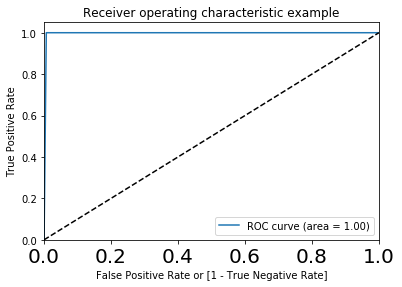

In [210]:
#Predicting the linear svm model on training data
Y_train_pred=model.predict(X_train_res)
eval_metrics(Y_train_res, Y_train_pred)


   prob  accuracy  sensitivity  specificity
0   0.0  0.908725     0.512605     0.946504


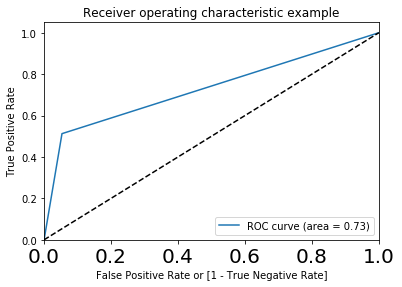

In [211]:
#Predicting the linear svm model on test data
Y_test_pred=model.predict(df_test_pca)
eval_metrics(Y_test, Y_test_pred)


## Random forest

In [212]:
RFC_balanced = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=500, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_split=1e-07,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample")

In [213]:
TrainedRFC= RFC_balanced.fit(X_train_res,Y_train_res)

C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The m

   prob  accuracy  sensitivity  specificity
0   0.0  0.856397     0.839387     0.873408


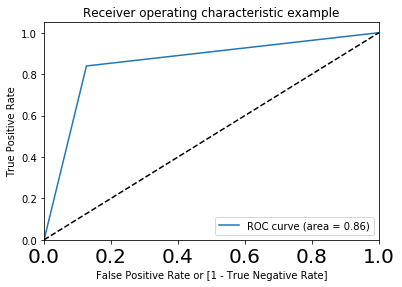

In [214]:
#Predicting the random forest model on test data
Y_train_pred=TrainedRFC.predict(X_train_res)
eval_metrics(Y_train_res, Y_train_pred)


   prob  accuracy  sensitivity  specificity
0   0.0  0.849277     0.728992     0.860749


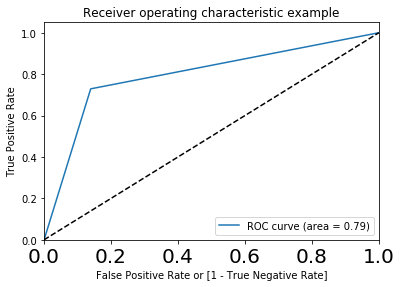

In [215]:
#Predicting the random forest model on test data
Y_test_pred=TrainedRFC.predict(df_test_pca)
eval_metrics(Y_test, Y_test_pred)

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      4991
           1       0.33      0.73      0.46       476

    accuracy                           0.85      5467
   macro avg       0.65      0.79      0.68      5467
weighted avg       0.92      0.85      0.87      5467

Accuracy for the test dataset 84.9%
ROC for the test dataset 88.0%


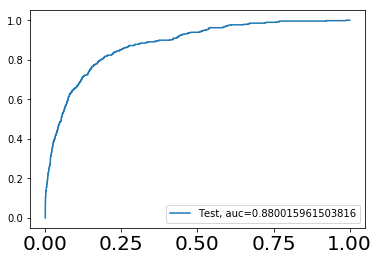

In [216]:
preds_RFC=TrainedRFC.predict(df_test_pca)
preds_probs_RFC=TrainedRFC.predict_proba(df_test_pca)[:,1]

print(classification_report(Y_test, preds_RFC))
accuracy = metrics.accuracy_score(Y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(Y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

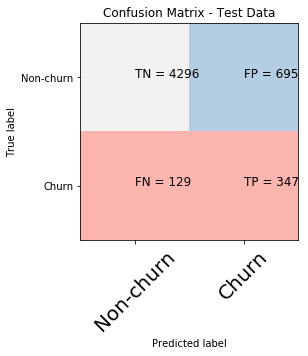

In [217]:
cm = confusion_matrix(Y_test, preds_RFC)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

In [218]:
print("accuracy", metrics.accuracy_score(Y_test, preds_RFC))
# precision
print("precision", metrics.precision_score(Y_test, preds_RFC))
# recall/sensitivity
print("recall", metrics.recall_score(Y_test, preds_RFC))

accuracy 0.8492774830802999
precision 0.3330134357005758
recall 0.7289915966386554


## Tuning max_depth

In [219]:
# GridSearchCV to find optimal n_estimators


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 25, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced",max_depth=12)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True)
rf.fit(X_train_res, Y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=12,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [220]:
## Score of grid search cv
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.742877,0.003056,0.017531,0.002020,2,{'max_depth': 2},0.657343,0.722777,0.722958,0.769923,...,0.714243,0.036724,5,0.661400,0.721789,0.729299,0.763707,0.698701,0.714979,0.033946
1,2.150206,0.075277,0.022840,0.003058,7,{'max_depth': 7},0.823926,0.834416,0.833375,0.815388,...,0.826897,0.006928,4,0.845750,0.837569,0.849257,0.830398,0.837392,0.840073,0.006688
2,3.140172,0.039700,0.031450,0.001769,12,{'max_depth': 12},0.909840,0.921079,0.918061,0.913815,...,0.916021,0.003860,3,0.943546,0.951165,0.955227,0.954415,0.955414,0.951953,0.004473
3,3.659682,0.075084,0.037464,0.005136,17,{'max_depth': 17},0.956793,0.952547,0.945541,0.948289,...,0.950142,0.004035,1,0.996815,0.994692,0.994005,0.995816,0.996191,0.995504,0.001019
4,3.974633,0.146676,0.038359,0.001987,22,{'max_depth': 22},0.953546,0.948551,0.952785,0.943542,...,0.949843,0.003595,2,0.997939,0.998002,0.998064,0.998626,0.997565,0.998039,0.000341


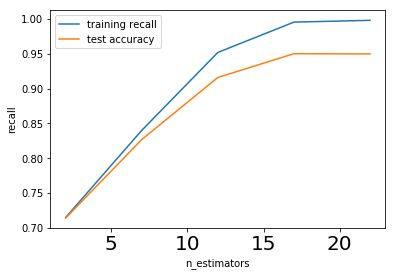

In [221]:
# plotting recall with n_estimators
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("recall")
plt.legend()

In [222]:
### as the max_depth increasing the model is starting to overfit

## tuning max_features

In [223]:
## Tuning max features
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24, 40]}

# instantiate the model
rf = RandomForestClassifier(max_depth=12)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall"
                    ,return_train_score=True)

rf.fit(X_train_res, Y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=12,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [224]:
## Score of grid search cv
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.162792,0.064618,0.032441,0.000557,4,{'max_features': 4},0.906593,0.916084,0.914064,0.899326,...,0.908428,0.006036,6,0.949853,0.947168,0.955726,0.937804,0.944986,0.947107,0.005880
1,4.050825,0.026193,0.033362,0.003477,8,{'max_features': 8},0.917832,0.926324,0.924806,0.916063,...,0.922316,0.004460,5,0.953413,0.958721,0.962907,0.952417,0.966217,0.958735,0.005322
2,6.973041,0.071089,0.033718,0.003478,14,{'max_features': 14},0.926074,0.926573,0.928304,0.934299,...,0.928511,0.002990,4,0.962093,0.964779,0.968715,0.968965,0.965155,0.965941,0.002593
3,9.840414,0.048191,0.031505,0.002026,20,{'max_features': 20},0.941309,0.933816,0.928554,0.931801,...,0.933407,0.004294,2,0.974646,0.968963,0.967528,0.969214,0.967404,0.969551,0.002650
4,12.251423,0.322815,0.030443,0.004801,24,{'max_features': 24},0.941309,0.928821,0.934299,0.933550,...,0.934706,0.004011,1,0.979142,0.963217,0.966966,0.972149,0.971712,0.970637,0.005372


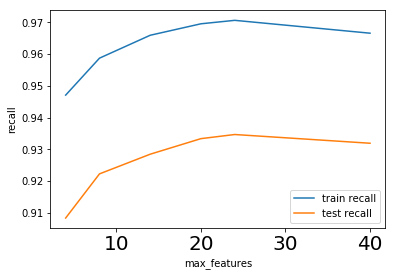

In [225]:
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="train recall")
plt.xlabel("max_features")
plt.ylabel("recall")
plt.legend()


plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("recall")
plt.legend()
plt.show()

## Tuning min_sample_leaf

In [226]:


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced",max_depth=12)


# fit tree on training data

rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                 return_train_score=True)
rf.fit(X_train_res, Y_train_res)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=12,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [227]:
## Score of grid search cv
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.533739,0.064155,0.022081,0.005359,100,{'min_samples_leaf': 100},0.829421,0.848651,0.845116,0.845366,...,0.841685,0.006747,1,0.849685,0.852994,0.849382,0.854003,0.848320,0.850877,0.002211
1,2.392308,0.070033,0.026975,0.003518,150,{'min_samples_leaf': 150},0.821928,0.826923,0.834374,0.825881,...,0.828845,0.005105,2,0.845501,0.832823,0.842950,0.834645,0.840702,0.839324,0.004845
2,2.258447,0.063701,0.026178,0.001823,200,{'min_samples_leaf': 200},0.813187,0.827922,0.816638,0.834624,...,0.822401,0.007819,3,0.830638,0.832823,0.826152,0.842950,0.820470,0.830607,0.007482
3,2.204890,0.067910,0.023113,0.003592,250,{'min_samples_leaf': 250},0.809690,0.824675,0.811391,0.819385,...,0.816806,0.005529,4,0.824205,0.822457,0.817597,0.827401,0.822530,0.822838,0.003175
4,2.097701,0.052403,0.028116,0.002806,300,{'min_samples_leaf': 300},0.795205,0.818182,0.809393,0.819385,...,0.809512,0.008881,5,0.811341,0.823206,0.809854,0.823030,0.805608,0.814608,0.007199


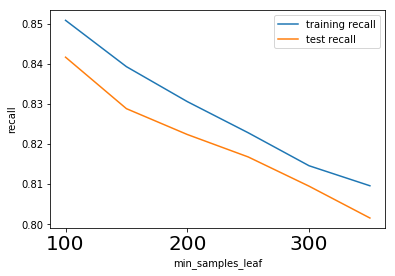

In [228]:
# plotting recall with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("recall")
plt.legend()
plt.show()


In [229]:
## As the no of min_sample leaf increses ,both train & test accuracy decreases.

## Tuning min_sample_split

In [230]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced",max_depth=12)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",
                return_train_score=True)
                    
rf.fit(X_train_res, Y_train_res)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=12,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [231]:
## Score of grid search cv
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.878582,0.057887,0.028003,0.001806,200,{'min_samples_split': 200},0.840410,0.858142,0.853610,0.850612,...,0.850227,0.005901,1,0.873665,0.870792,0.871175,0.861684,0.863120,0.868087,0.004768
1,2.789004,0.059561,0.027455,0.001090,250,{'min_samples_split': 250},0.844156,0.857393,0.840620,0.849863,...,0.846530,0.006397,2,0.867108,0.861175,0.855189,0.858499,0.855314,0.859457,0.004422
2,2.754489,0.037168,0.025796,0.005108,300,{'min_samples_split': 300},0.829920,0.842657,0.836872,0.841619,...,0.839686,0.005913,3,0.854056,0.847686,0.848508,0.858249,0.859123,0.853524,0.004758
3,2.727728,0.070014,0.027825,0.000877,350,{'min_samples_split': 350},0.823177,0.844156,0.832875,0.829128,...,0.831393,0.007098,4,0.851246,0.846750,0.842325,0.845198,0.841326,0.845369,0.003524


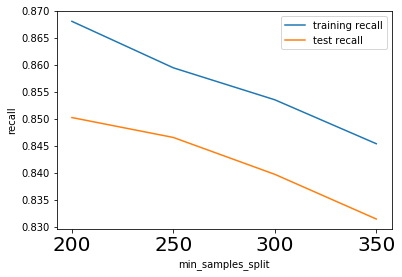

In [232]:
# plotting recall with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("recall")
plt.legend()
plt.show()



### as the min_sample_split increases ,test and train both accuracy decreases.

## Important features for prediction as per random forest

In [236]:
importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

,colName,value
0,0.252370,mobile_number
1,0.128916,onnet_mou_7
2,0.097339,last_date_of_month_8
3,0.045143,loc_og_mou_8
4,0.045004,spl_og_mou_6
5,0.040370,roam_og_mou_8
6,0.034697,onnet_mou_8
7,0.029733,total_og_mou_6
8,0.026329,og_others_8
9,0.023279,offnet_mou_8


<Figure size 1440x216 with 0 Axes>

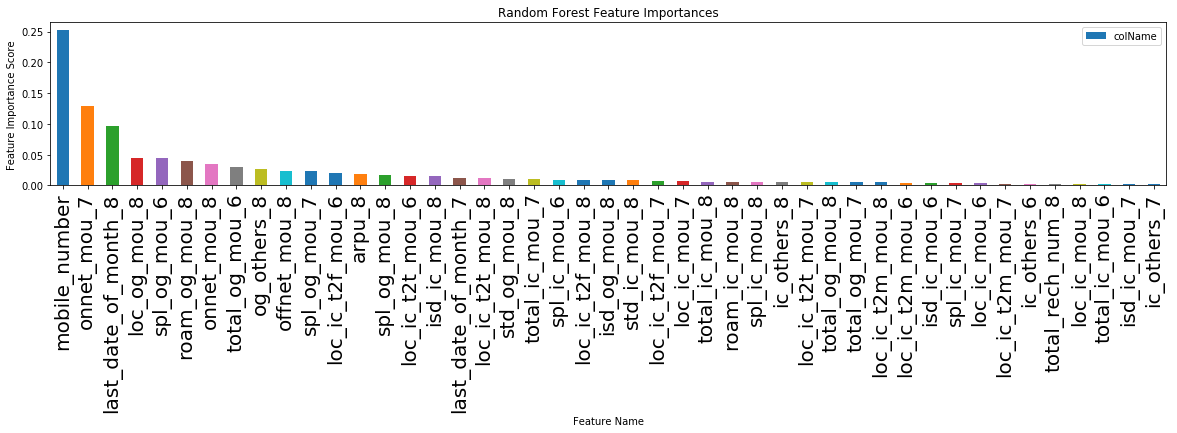

In [238]:
plt.clf()
from pylab import rcParams
rcParams['figure.figsize'] = 20, 3
sorted_feature_importance[0:50].plot(x='value', y='colName' , kind='bar', title='Random Forest Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Name')

plt.show()

# conclusion and inferences

In [ ]:
## data read and analysed. null values are handled
## high value customers are infered.
## marked churned and non churned.
## PCA is done and then Logistic regression model,SVM model,and random forest model built .
## All the models evaluated on metrics such as accuracy,sensitivity ,specificity.
##  all the hyperparameters tuned.
## All the important churn predictors were inferred.
## after analysing all the models for all the mwtrics we can say that SVM was the best ..it has 90% accuracy on test set and 94% 
## specificity.